In [ ]:
!pip install scanpy
!pip install numpy
!pip install pandas
!pip install igraph
!pip install leidenalg

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import igraph
import leidenalg

In [69]:
def pp(h5_path):
  adata = sc.read_10x_h5(h5_path)
  adata.var_names_make_unique()
  adata.obs_names_make_unique()
  sc.pp.filter_cells(adata, min_genes=100)
  sc.pp.filter_genes(adata, min_cells=3)

  # mitochondrial genes, "MT-" for human, "Mt-" for mouse
  adata.var["mt"] = adata.var_names.str.startswith("MT-")

  sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], inplace=True, log1p=True
  )

  adata.layers["counts"] = adata.X.copy()
  sc.pp.normalize_total(adata, target_sum=1e4)
  sc.pp.log1p(adata)

  sc.pp.highly_variable_genes(adata, n_top_genes=2000)
  adata = adata[:, adata.var.highly_variable]
  sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

  sc.pp.scale(adata, max_value=10)

  sc.tl.pca(adata)
  sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
  sc.tl.leiden(adata, resolution=0.2)
  sc.tl.umap(adata)
  return adata

In [70]:
data1 = pp('/content/GSM4432646_EC1_raw_gene_bc_matrices_h5.h5')
data2 = pp('/content/GSM4432645_EC2_raw_gene_bc_matrices_h5.h5')
data3 = pp('/content/GSM4432647_EC3_raw_gene_bc_matrices_h5.h5')
data4 = pp('/content/GSM4432648_EC4_raw_gene_bc_matrices_h5.h5')
data5 = pp('/content/GSM4432651_EC5_raw_gene_bc_matrices_h5.h5')
data6 = pp('/content/GSM4432649_EC6_raw_gene_bc_matrices_h5.h5')
data7 = pp('/content/GSM4432650_EC7_raw_gene_bc_matrices_h5.h5')
data8 = pp('/content/GSM4432653_EC8_raw_gene_bc_matrices_h5.h5')
data9 = pp('/content/GSM4432652_EC9_raw_gene_bc_matrices_h5.h5')
data10 = pp('/content/GSM4432654_EC10_raw_gene_bc_matrices_h5.h5')

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple

In [71]:
data1.obs['Braak_stage'] = 0
data2.obs['Braak_stage'] = 0
data3.obs['Braak_stage'] = 0
data4.obs['Braak_stage'] = 2
data5.obs['Braak_stage'] = 2
data6.obs['Braak_stage'] = 2
data7.obs['Braak_stage'] = 2
data8.obs['Braak_stage'] = 6
data9.obs['Braak_stage'] = 6
data10.obs['Braak_stage'] = 6

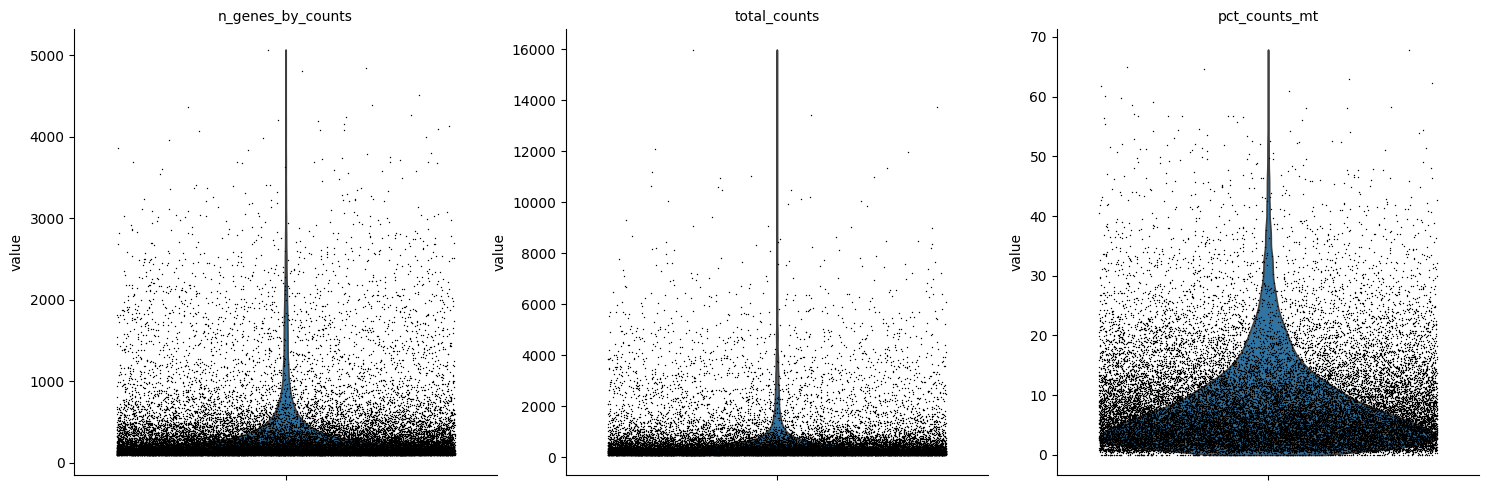

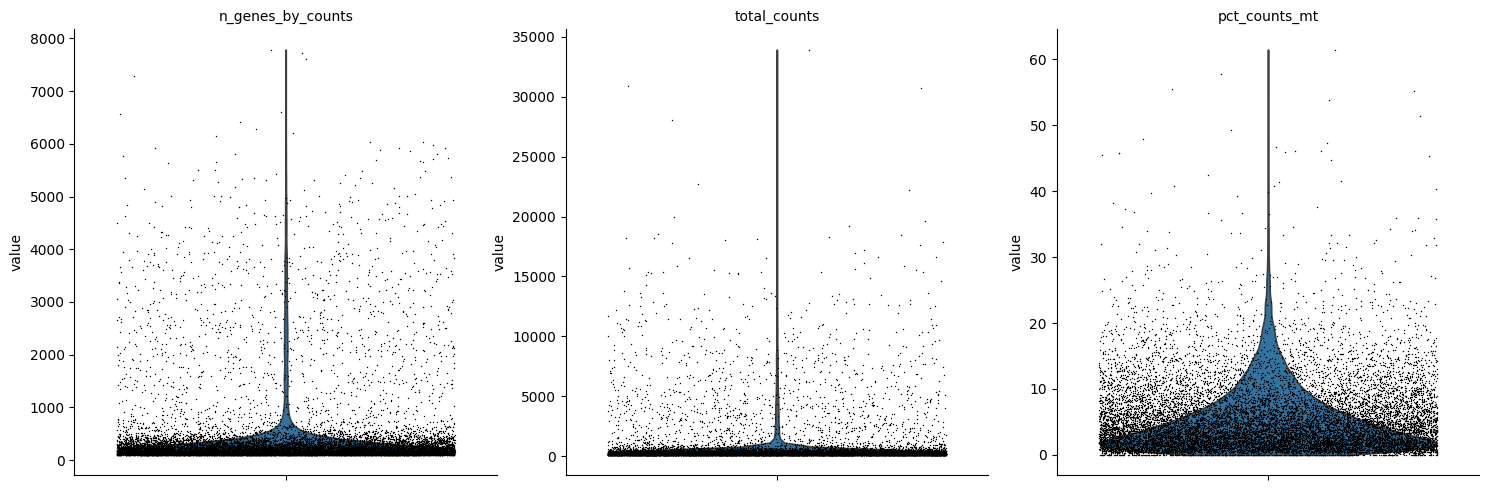

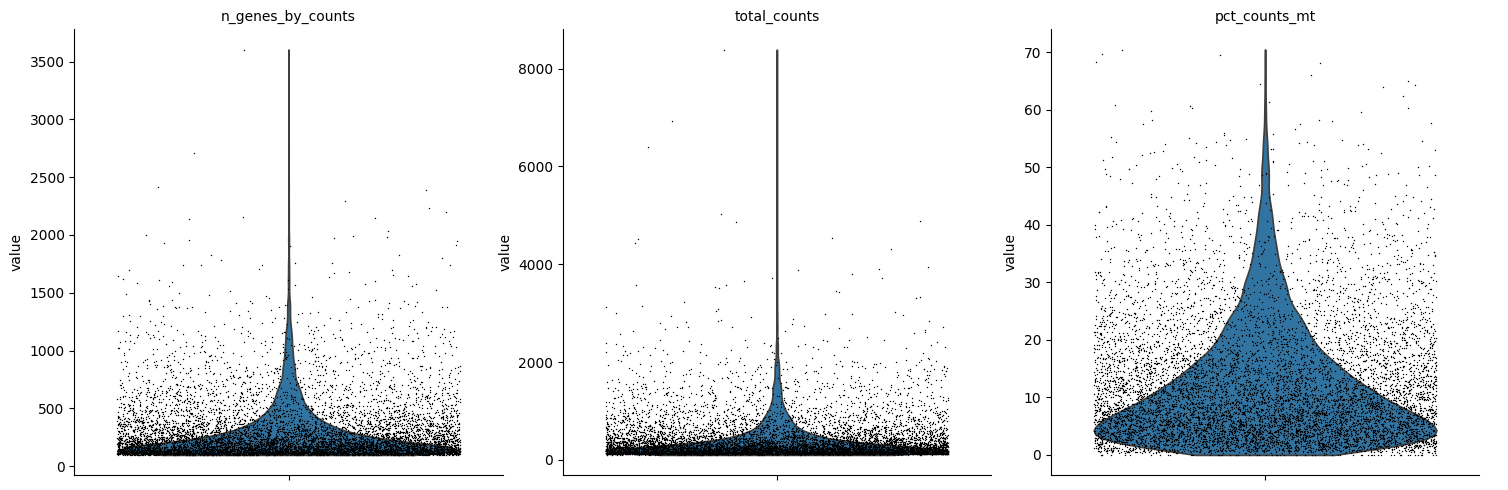

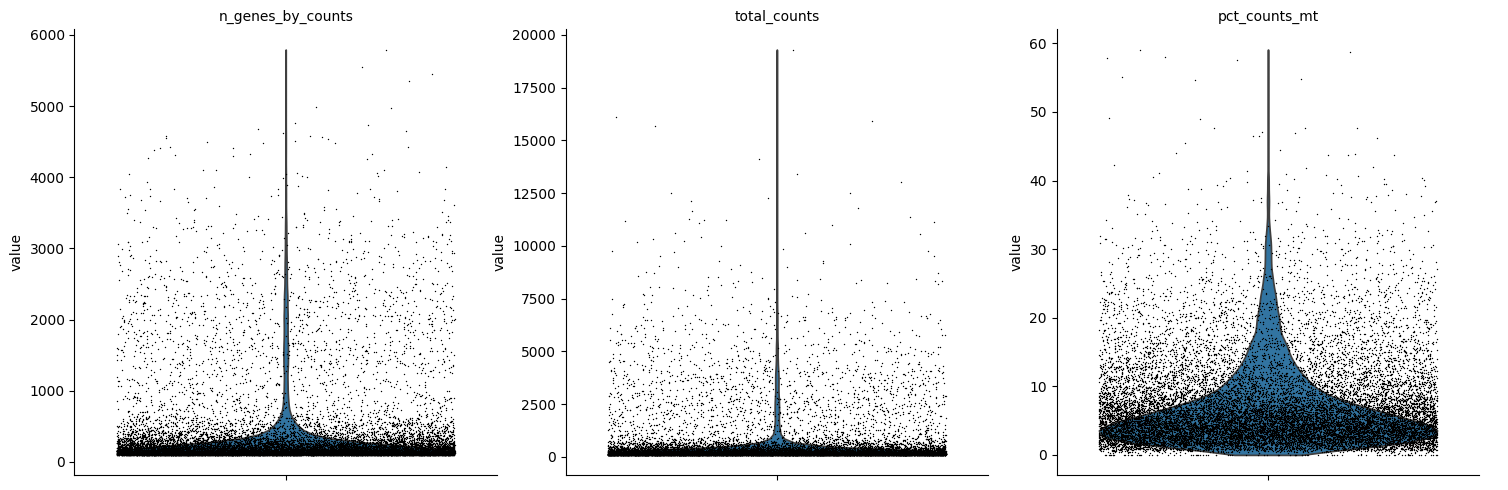

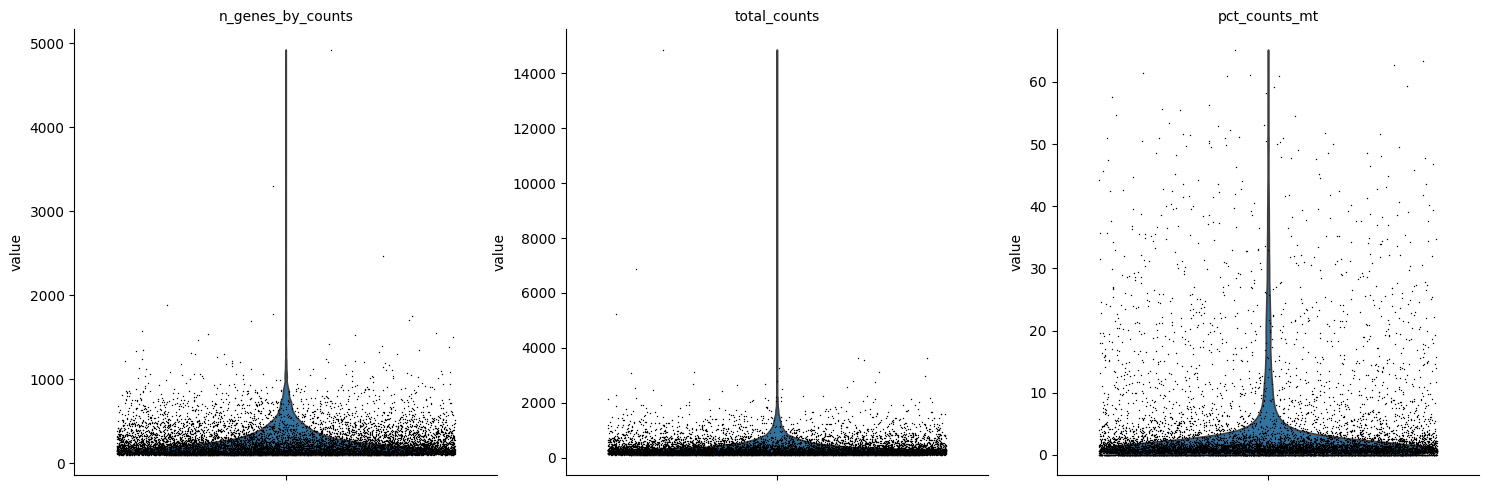

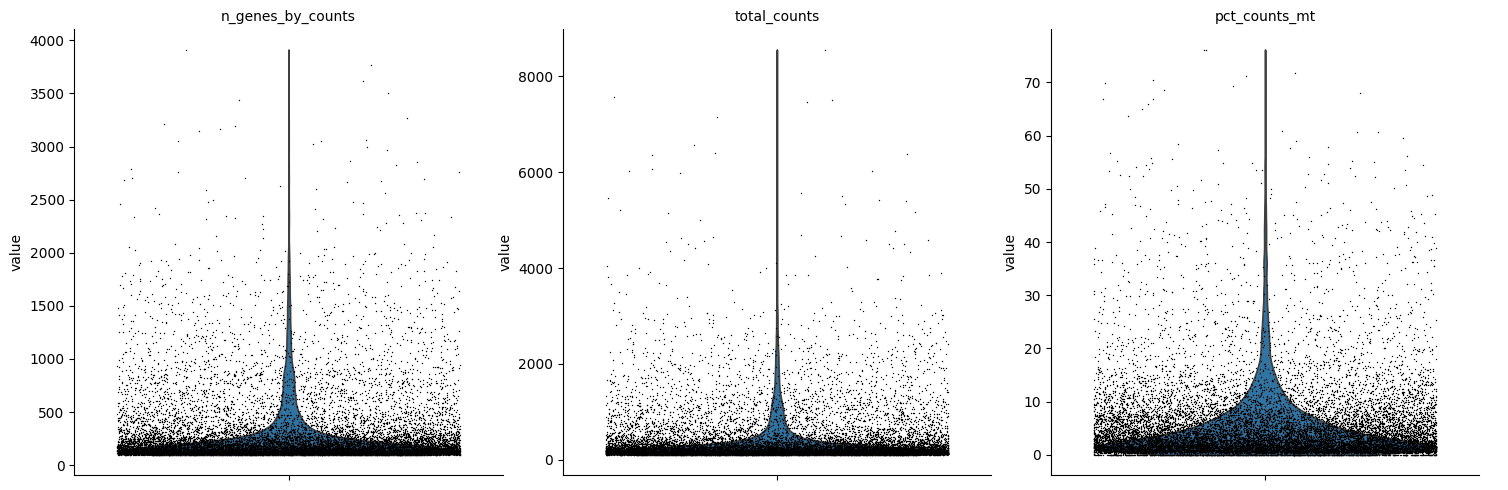

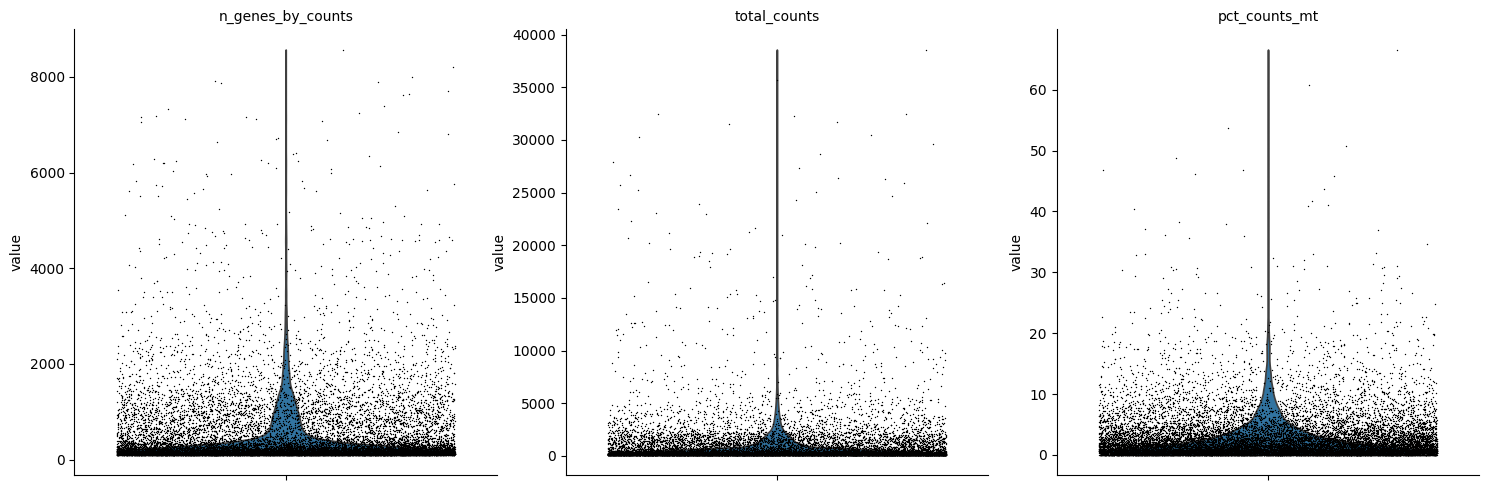

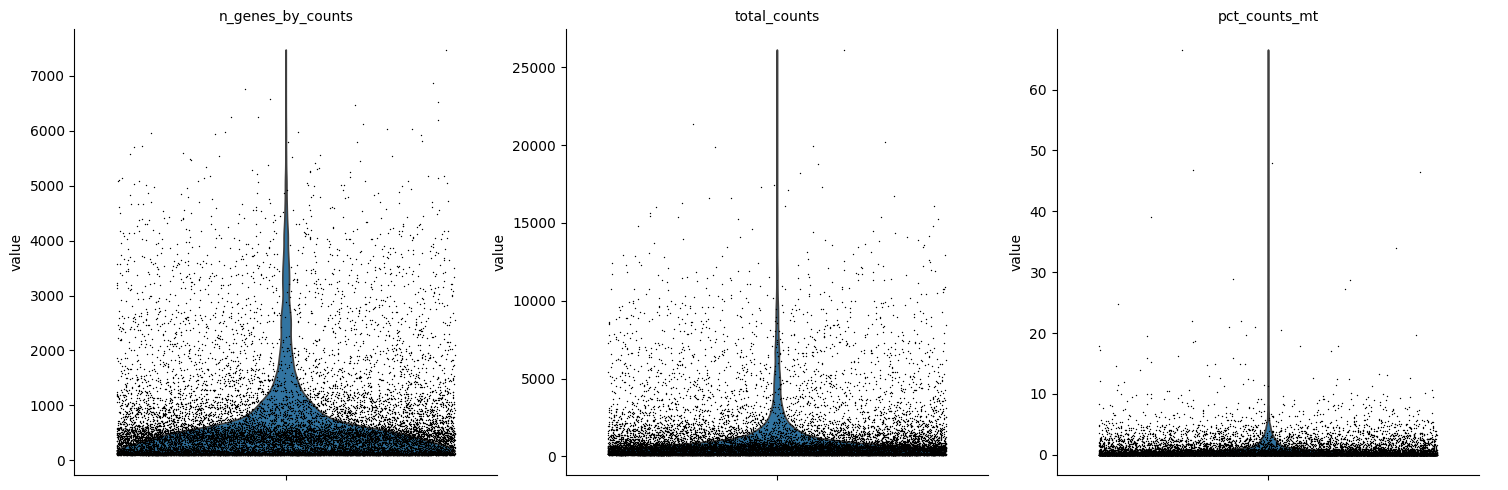

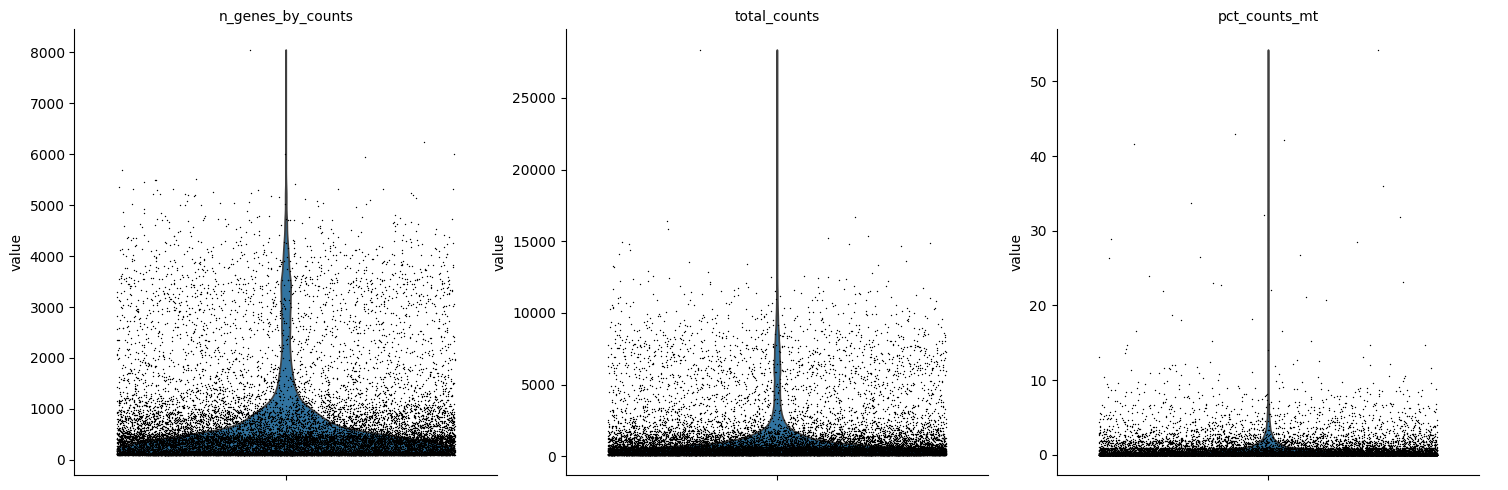

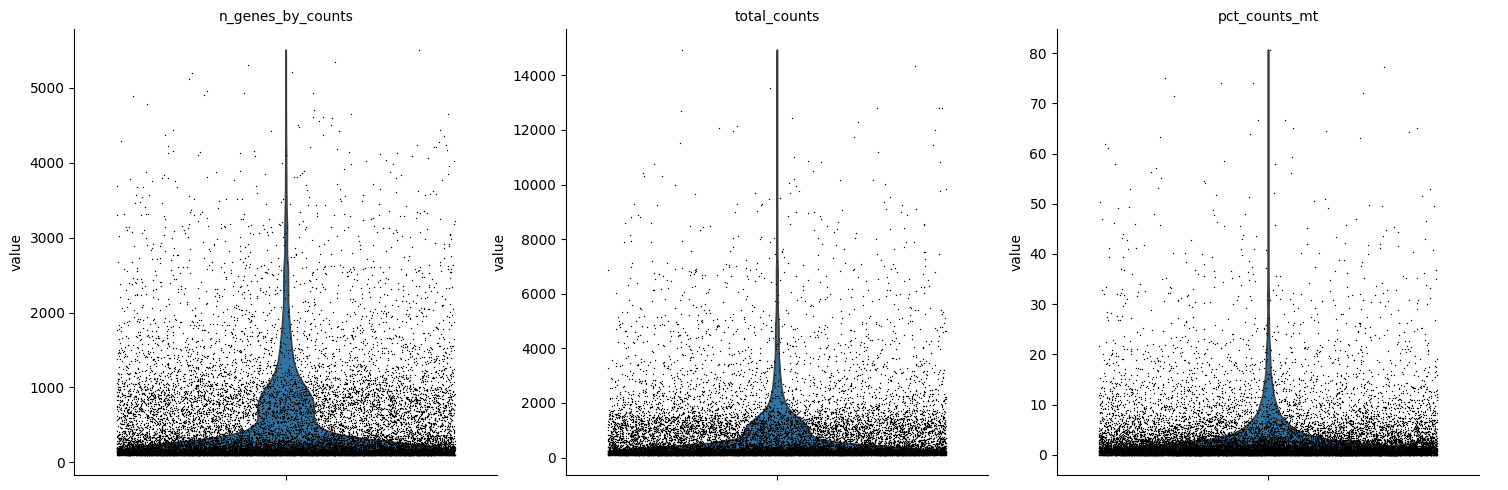

In [72]:
sc.pl.violin(
    data1,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data2,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data3,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data4,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data5,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data6,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data7,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data8,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data9,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    data10,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

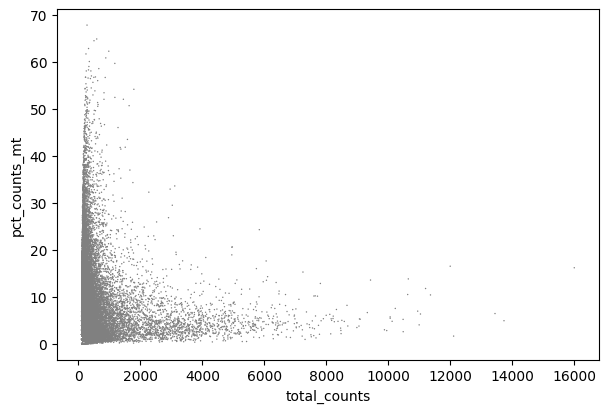

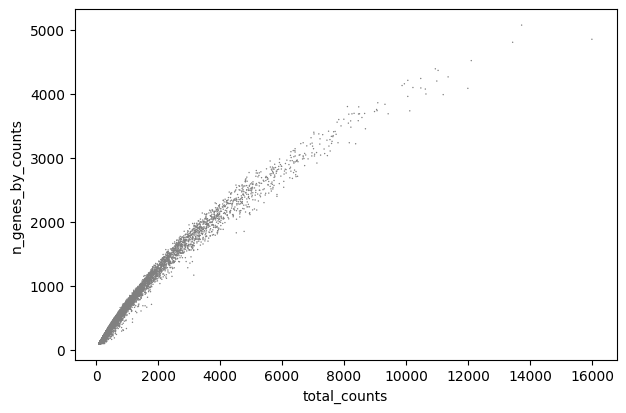

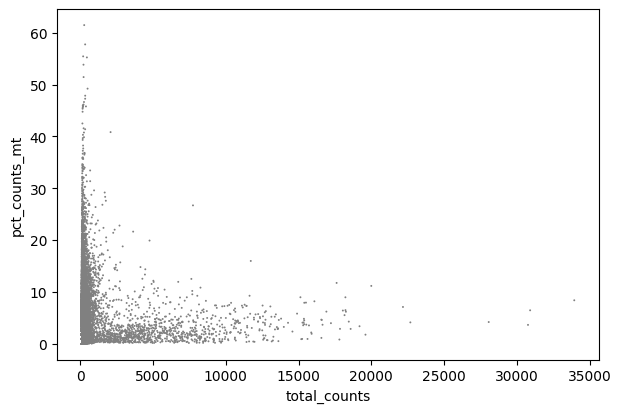

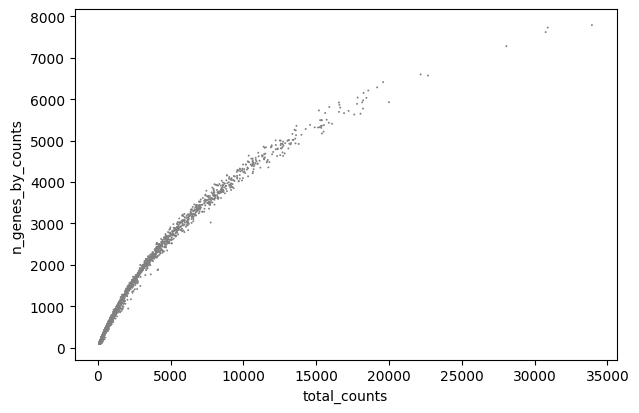

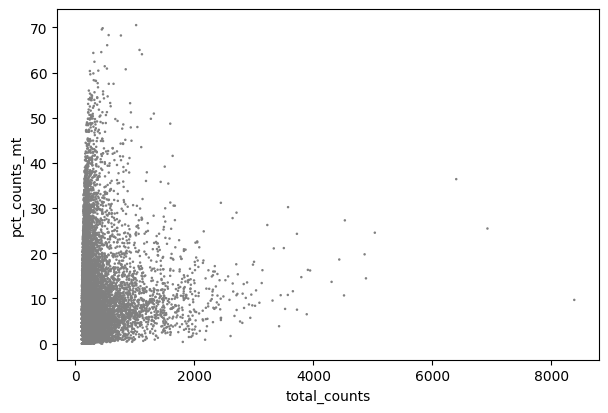

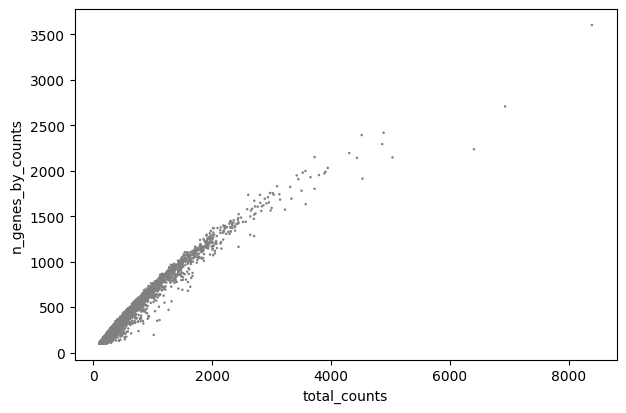

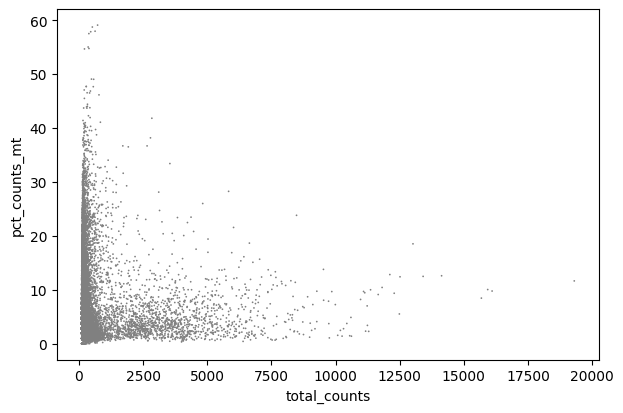

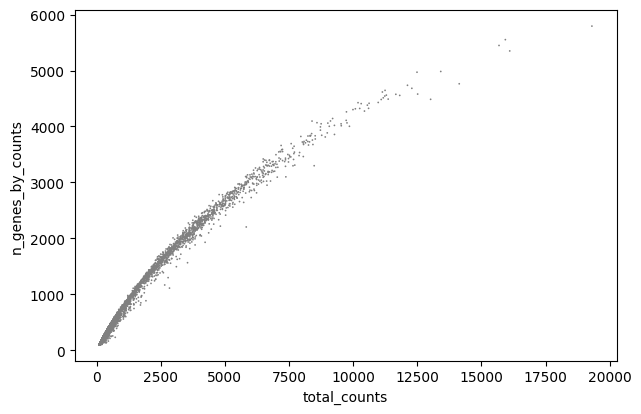

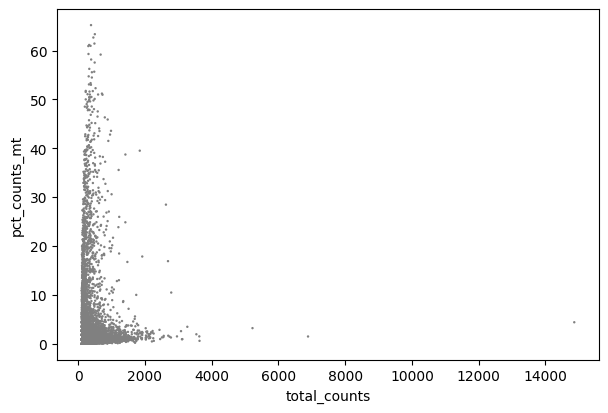

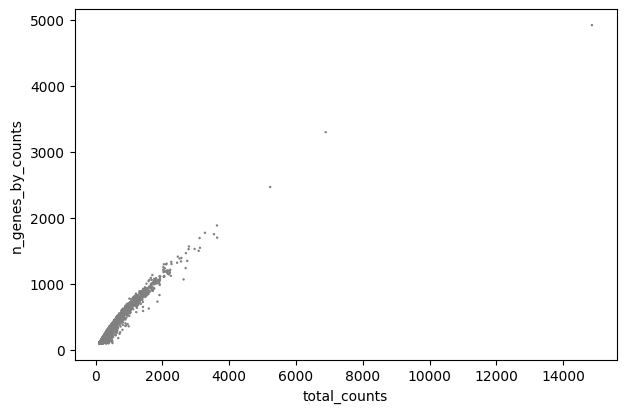

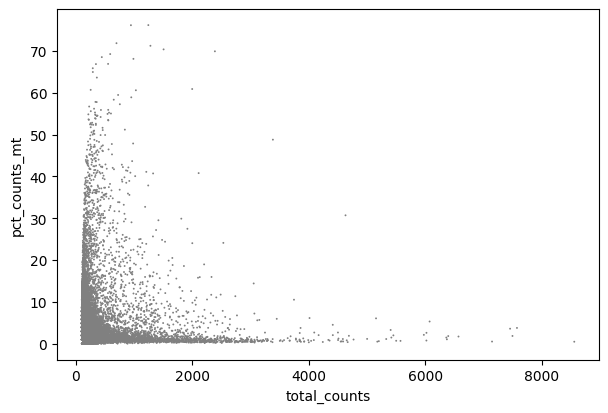

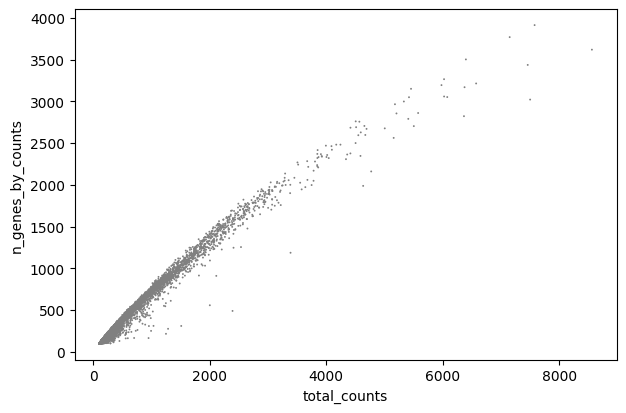

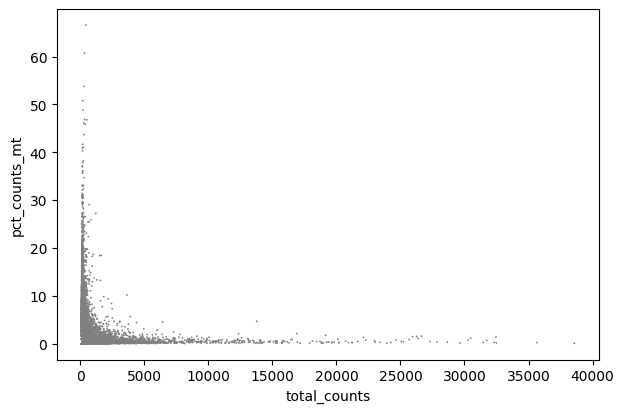

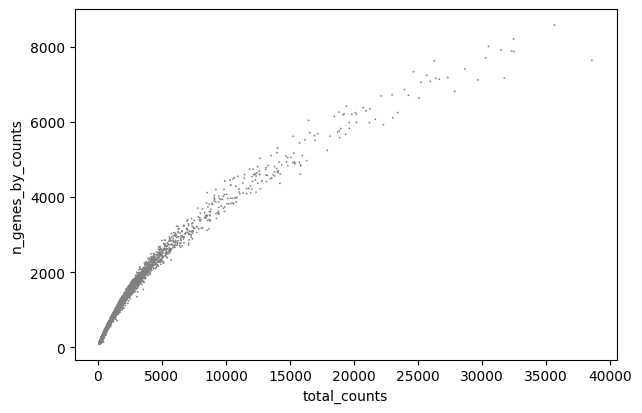

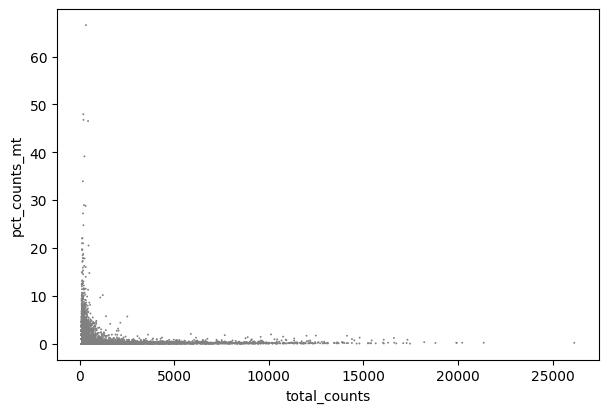

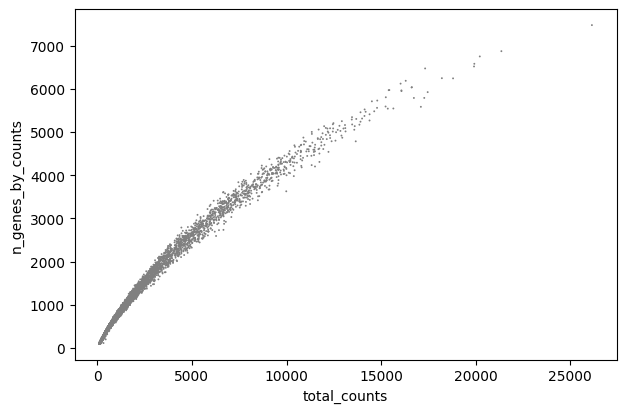

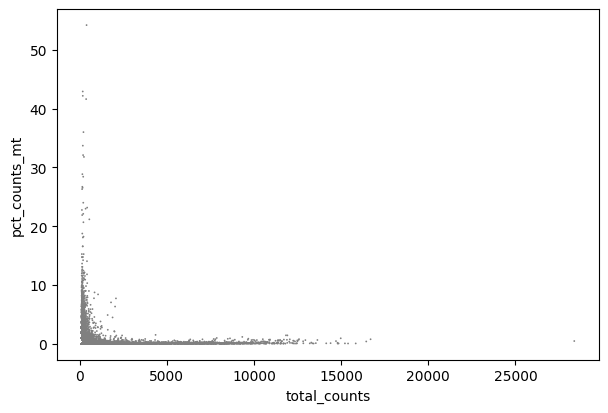

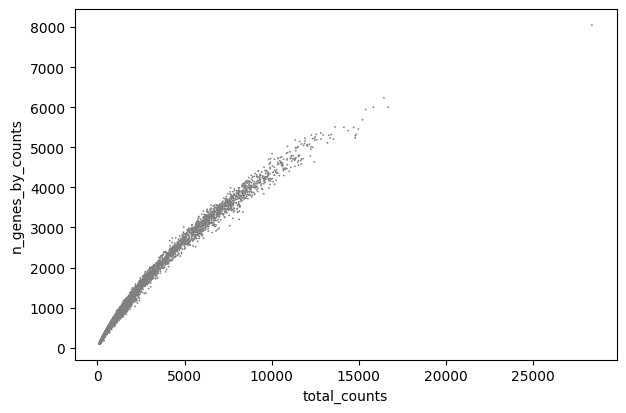

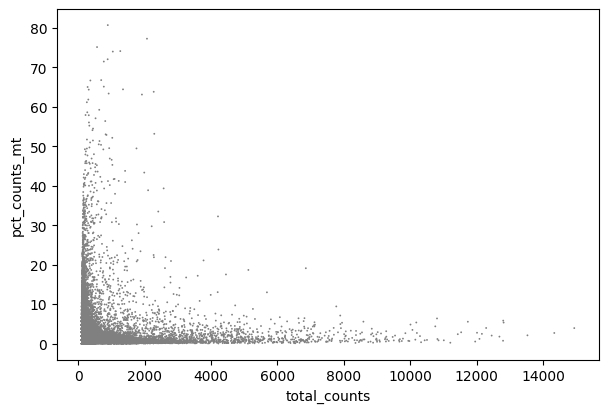

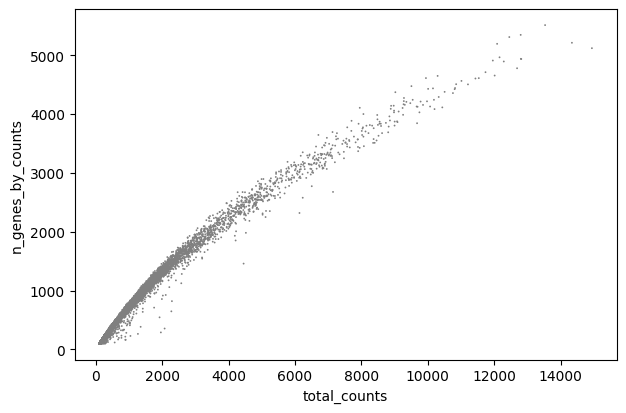

In [73]:
sc.pl.scatter(data1, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data1, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data2, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data2, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data3, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data3, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data4, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data4, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data5, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data5, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data6, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data6, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data7, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data7, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data8, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data8, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data9, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data9, x="total_counts", y="n_genes_by_counts")

sc.pl.scatter(data10, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(data10, x="total_counts", y="n_genes_by_counts")

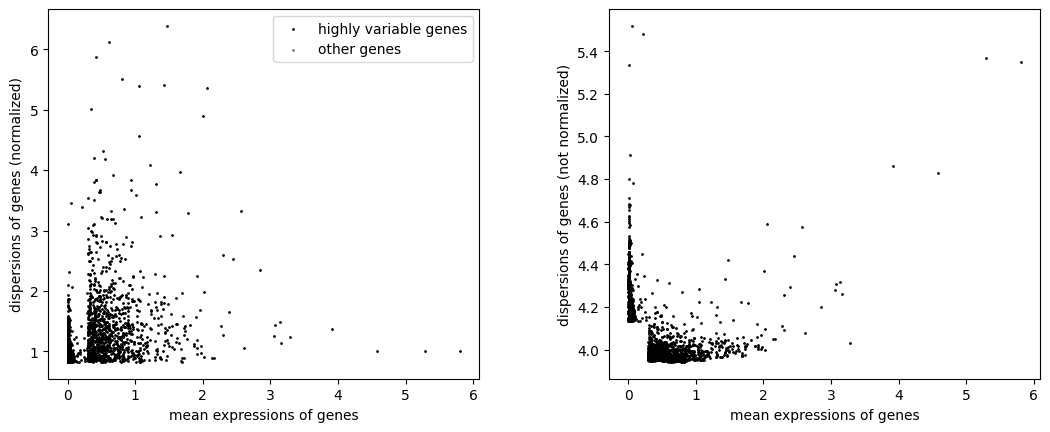

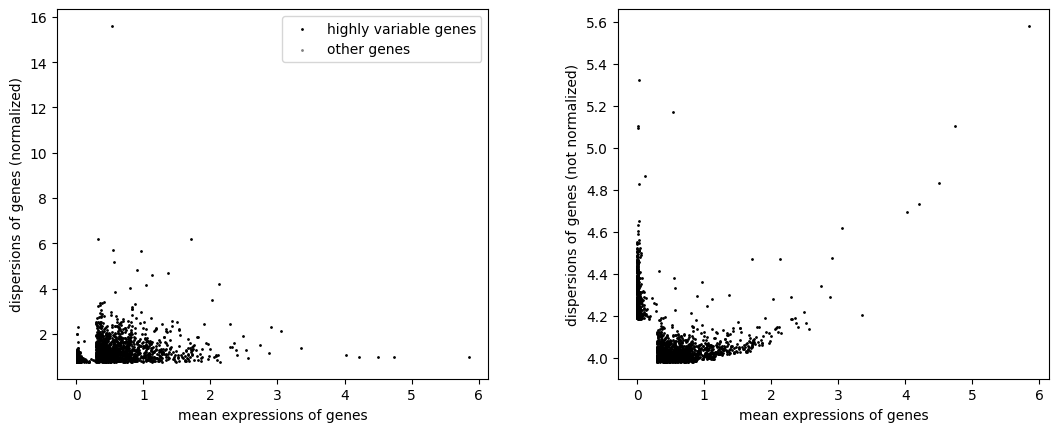

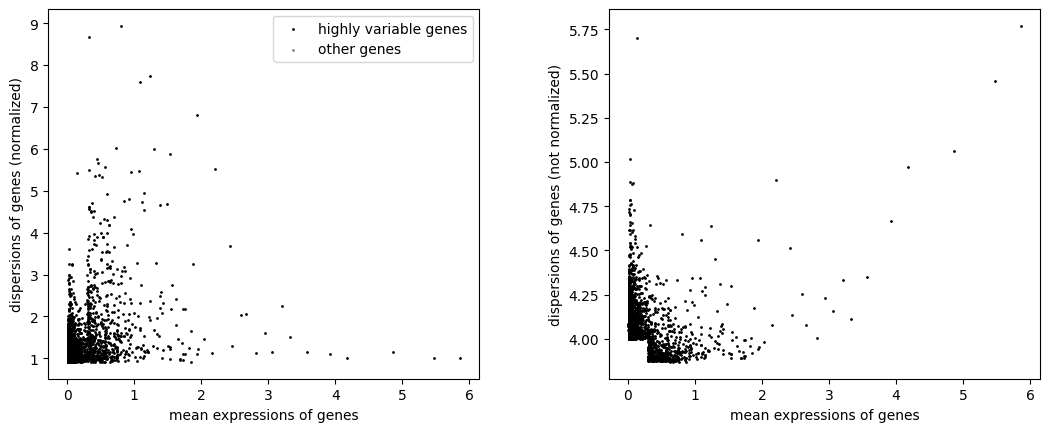

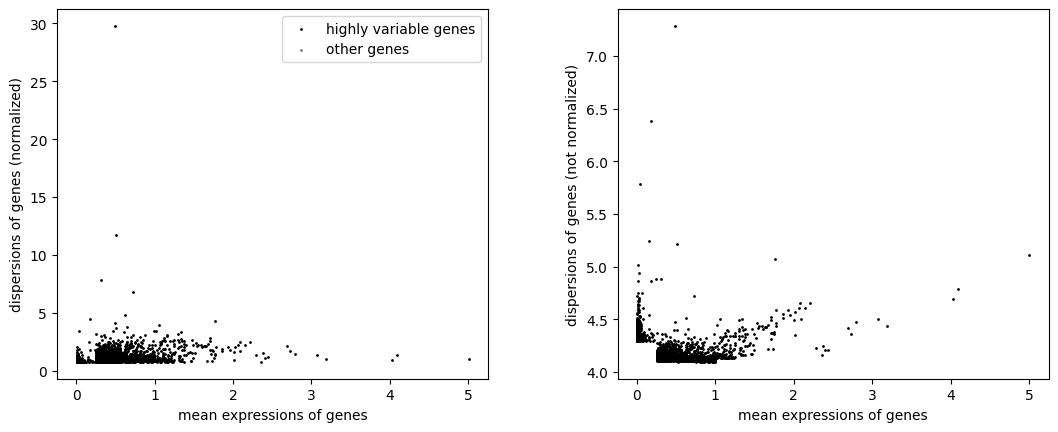

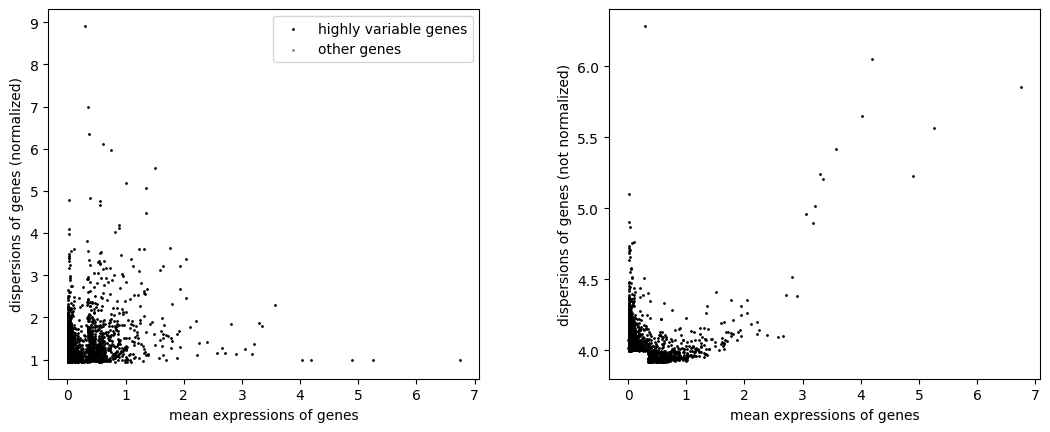

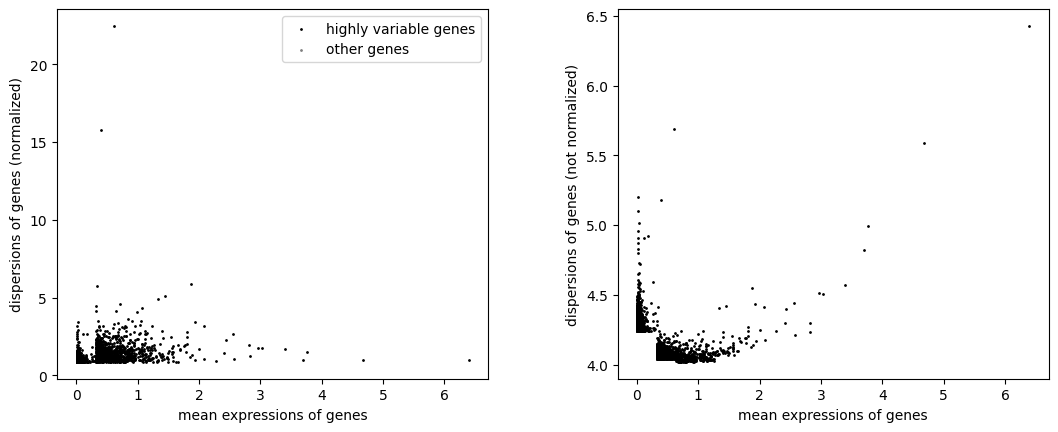

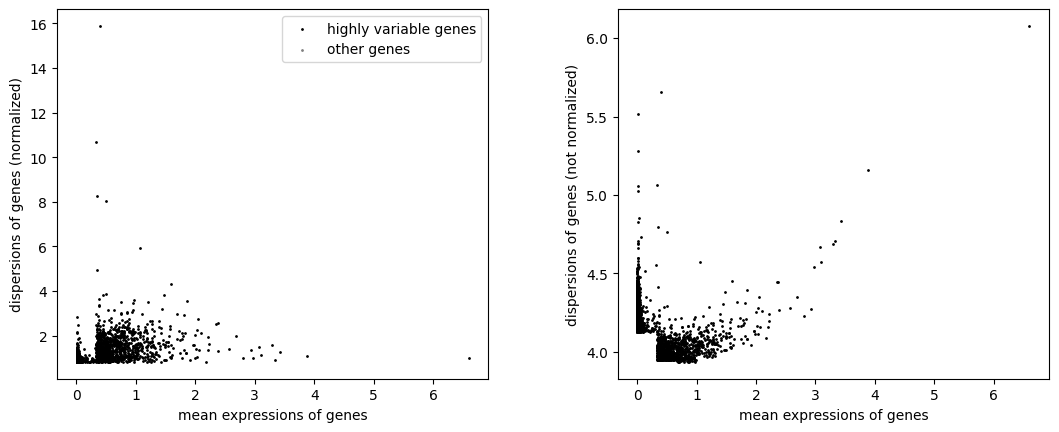

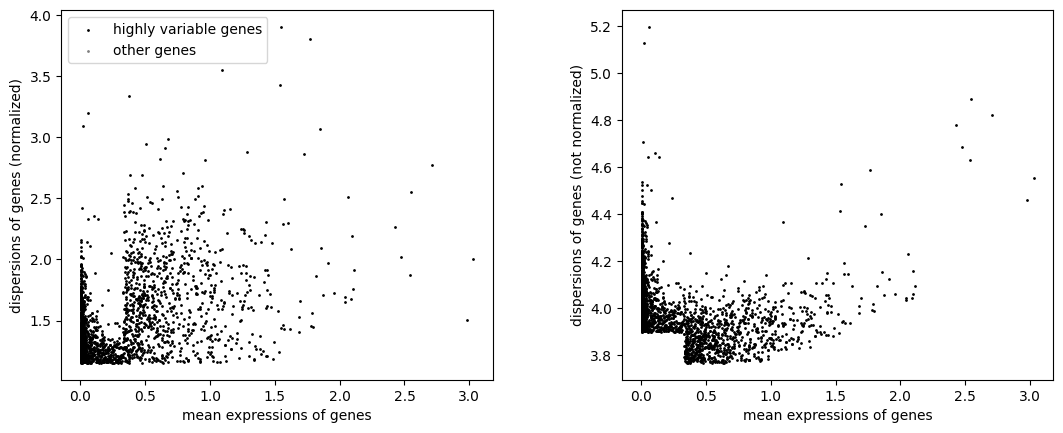

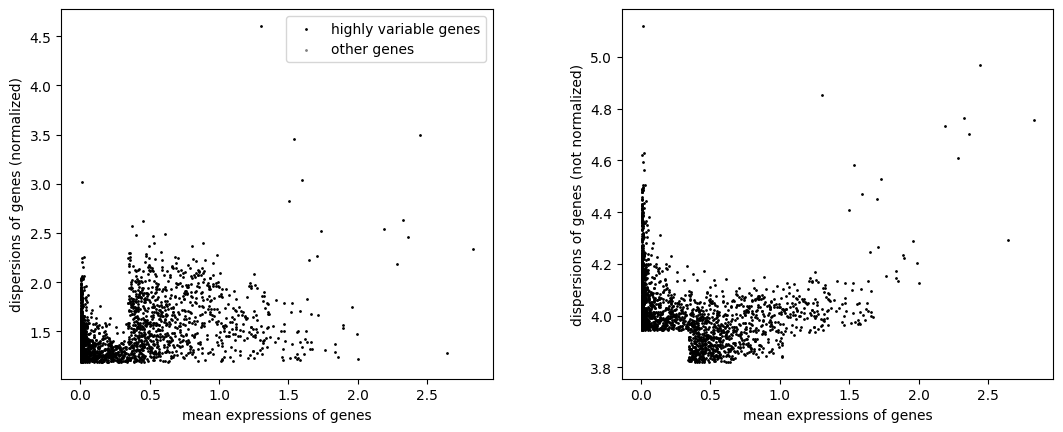

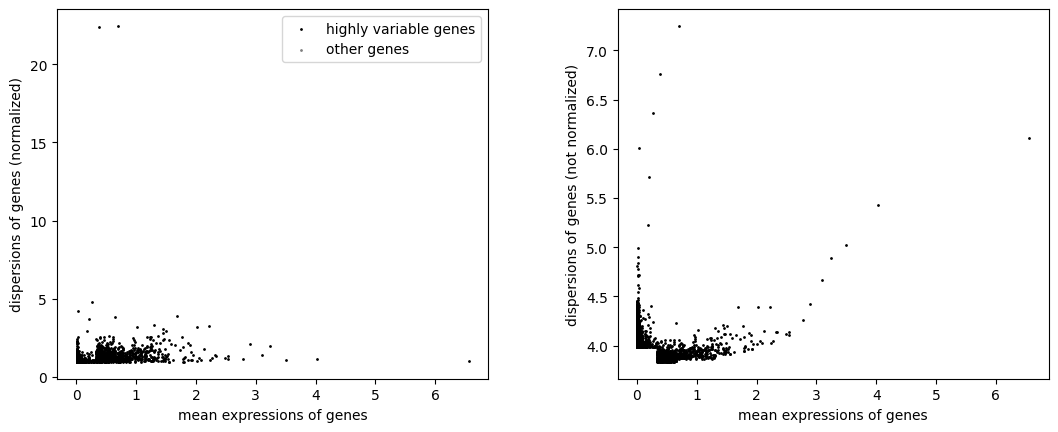

In [74]:
sc.pl.highly_variable_genes(data1)
sc.pl.highly_variable_genes(data2)
sc.pl.highly_variable_genes(data3)
sc.pl.highly_variable_genes(data4)
sc.pl.highly_variable_genes(data5)
sc.pl.highly_variable_genes(data6)
sc.pl.highly_variable_genes(data7)
sc.pl.highly_variable_genes(data8)
sc.pl.highly_variable_genes(data9)
sc.pl.highly_variable_genes(data10)

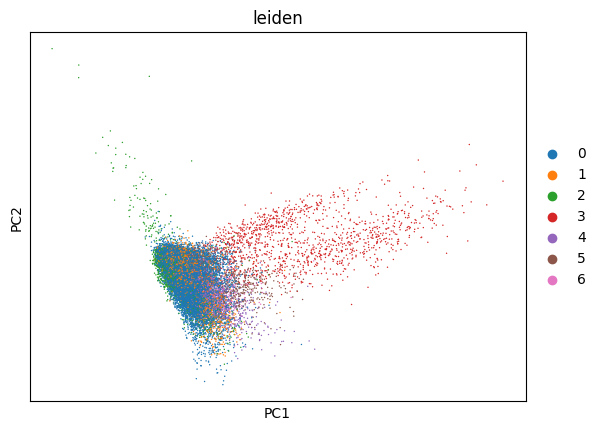

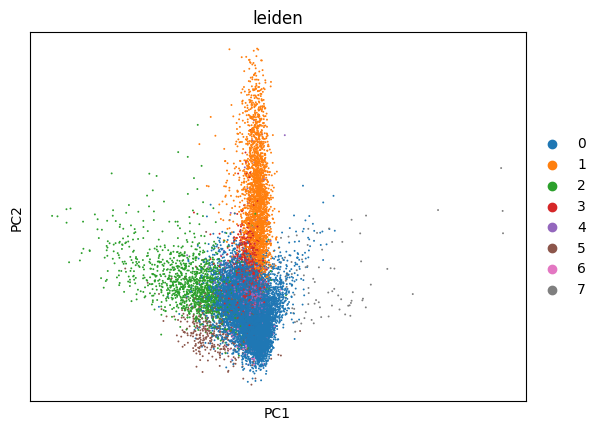

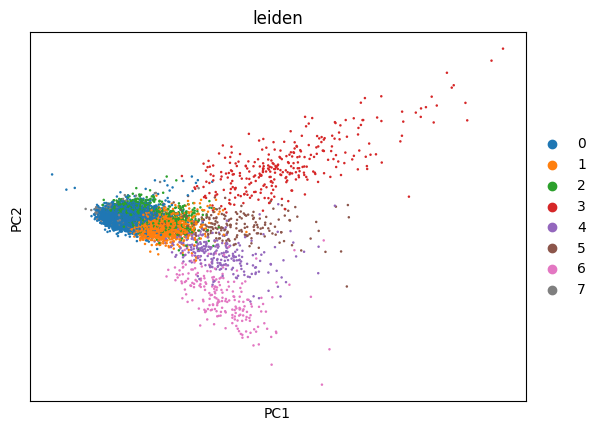

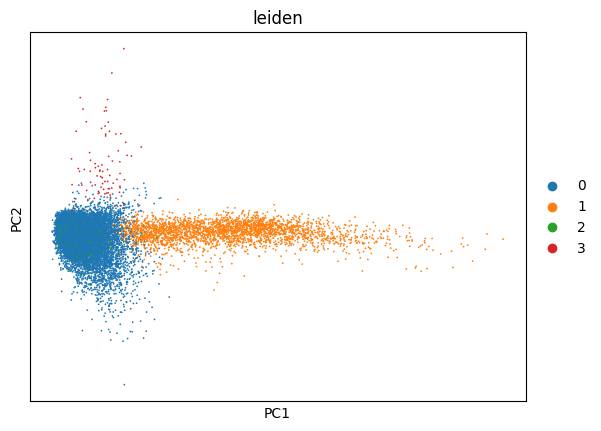

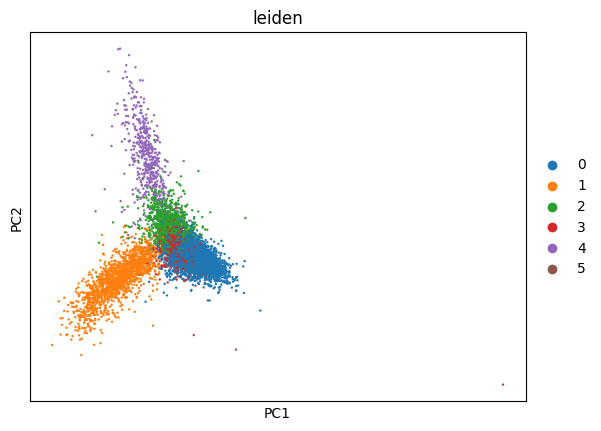

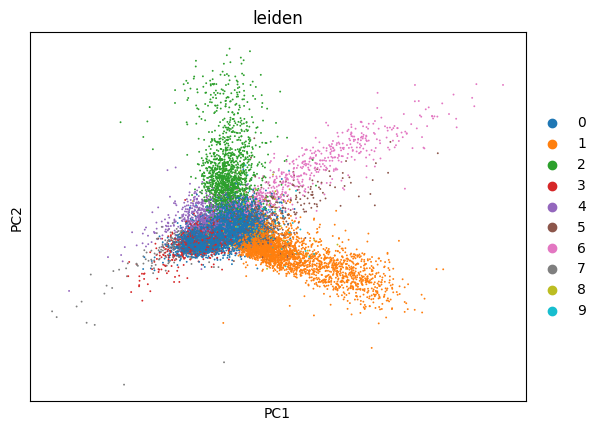

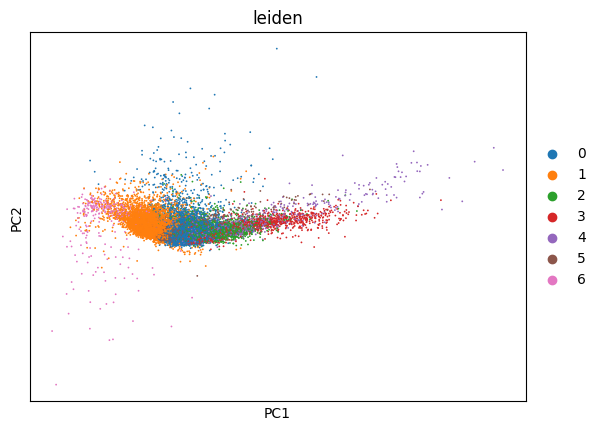

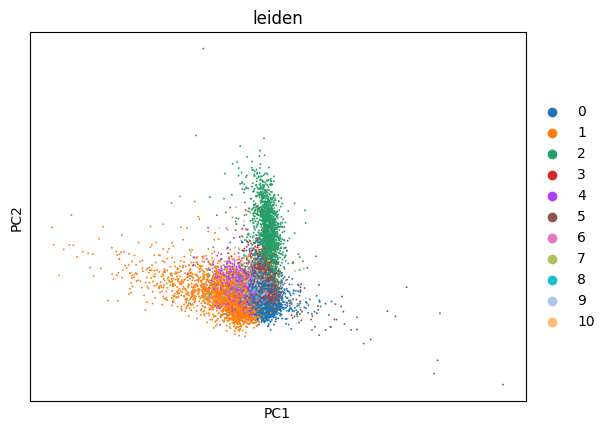

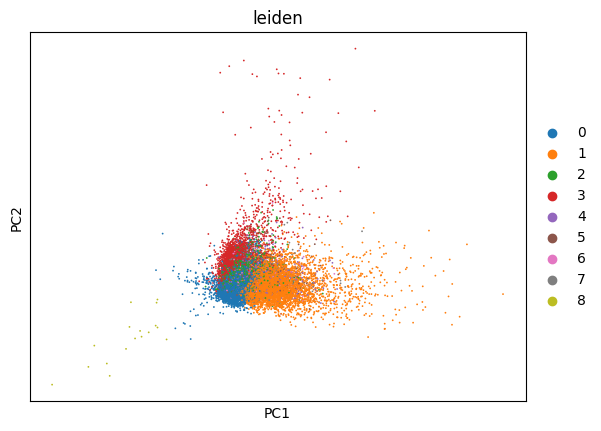

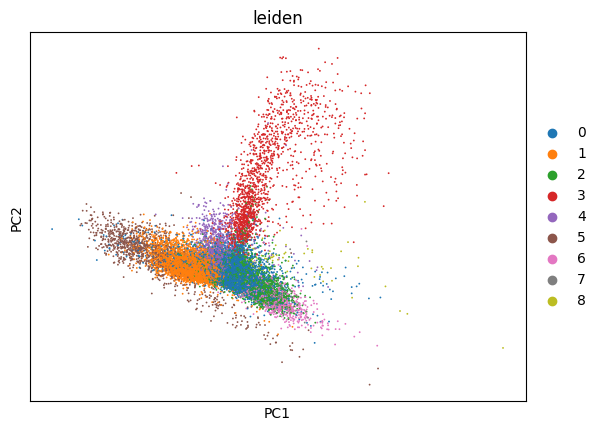

In [75]:
sc.pl.pca(data1, color="leiden")
sc.pl.pca(data2, color="leiden")
sc.pl.pca(data3, color="leiden")
sc.pl.pca(data4, color="leiden")
sc.pl.pca(data5, color="leiden")
sc.pl.pca(data6, color="leiden")
sc.pl.pca(data7, color="leiden")
sc.pl.pca(data8, color="leiden")
sc.pl.pca(data9, color="leiden")
sc.pl.pca(data10, color="leiden")

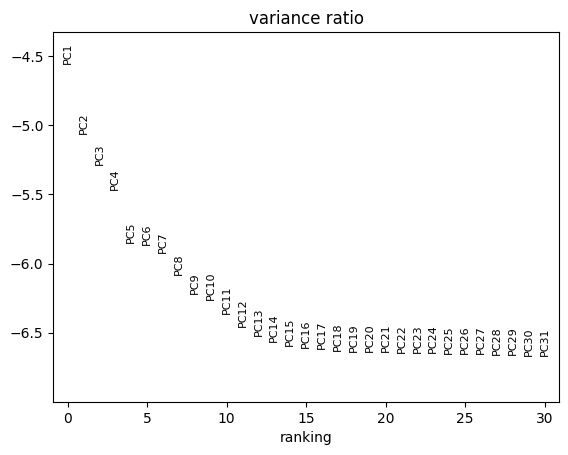

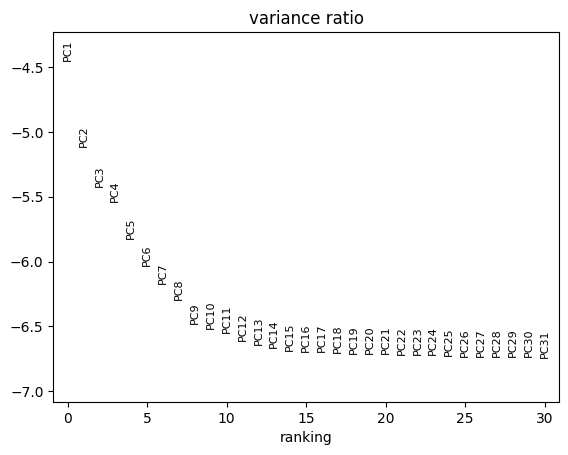

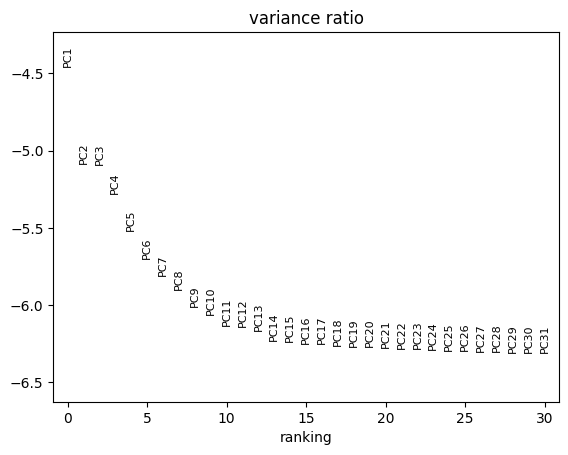

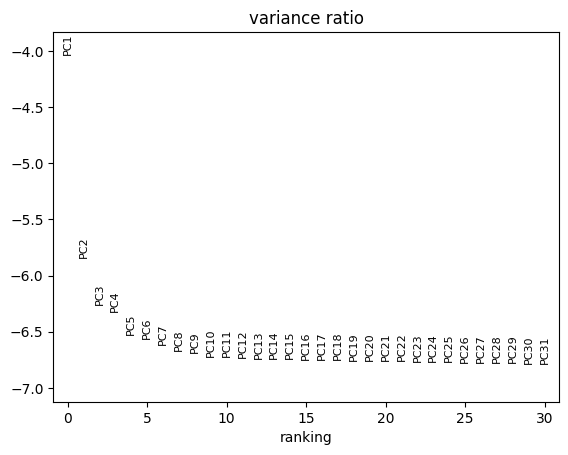

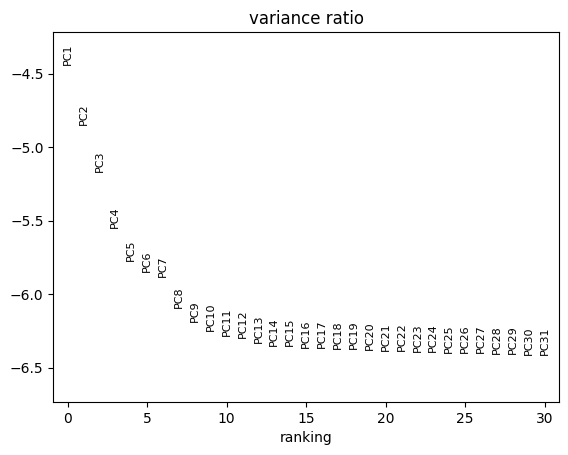

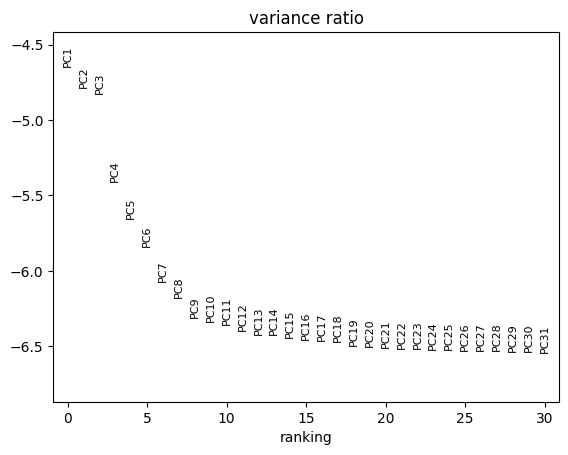

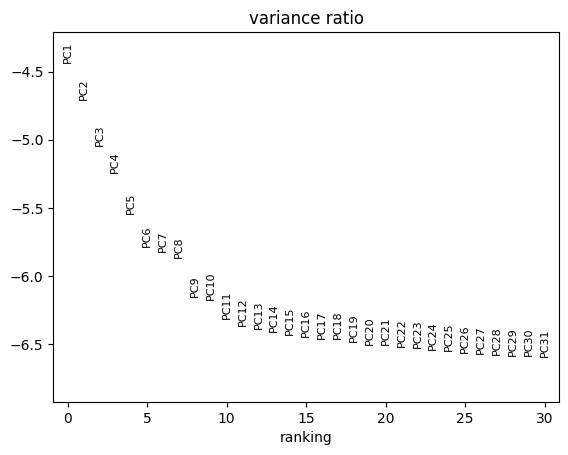

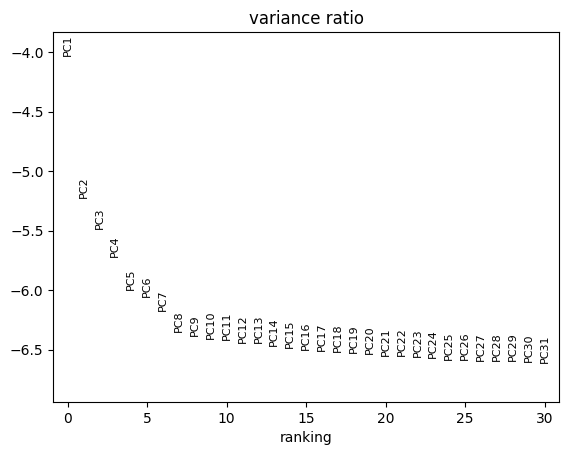

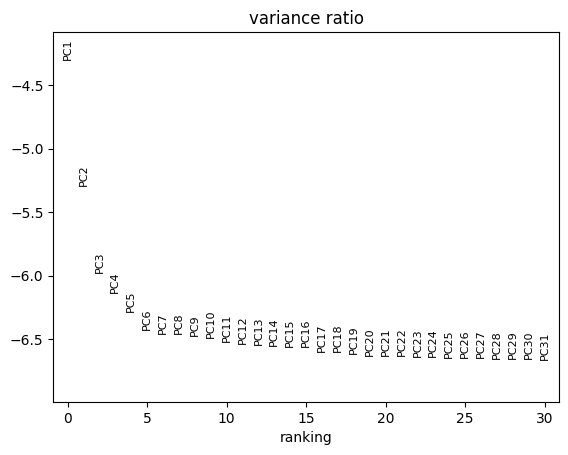

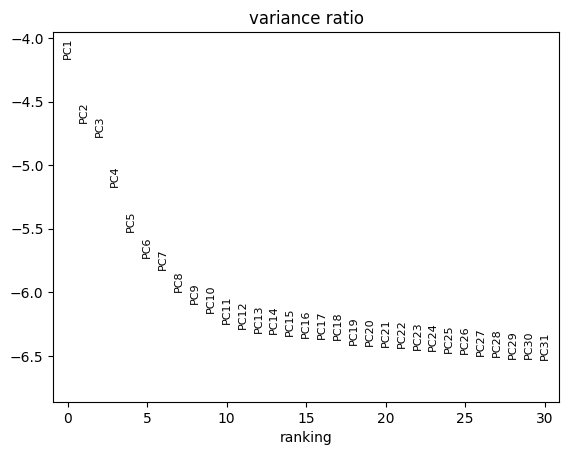

In [76]:
sc.pl.pca_variance_ratio(data1, log=True)
sc.pl.pca_variance_ratio(data2, log=True)
sc.pl.pca_variance_ratio(data3, log=True)
sc.pl.pca_variance_ratio(data4, log=True)
sc.pl.pca_variance_ratio(data5, log=True)
sc.pl.pca_variance_ratio(data6, log=True)
sc.pl.pca_variance_ratio(data7, log=True)
sc.pl.pca_variance_ratio(data8, log=True)
sc.pl.pca_variance_ratio(data9, log=True)
sc.pl.pca_variance_ratio(data10, log=True)

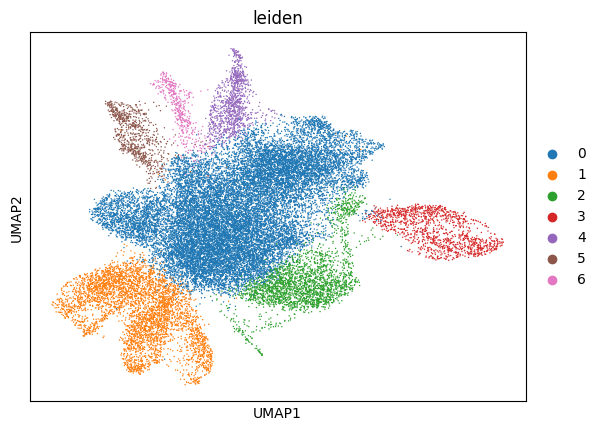

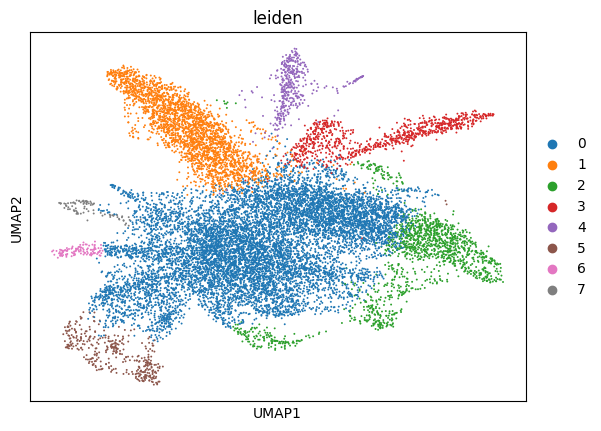

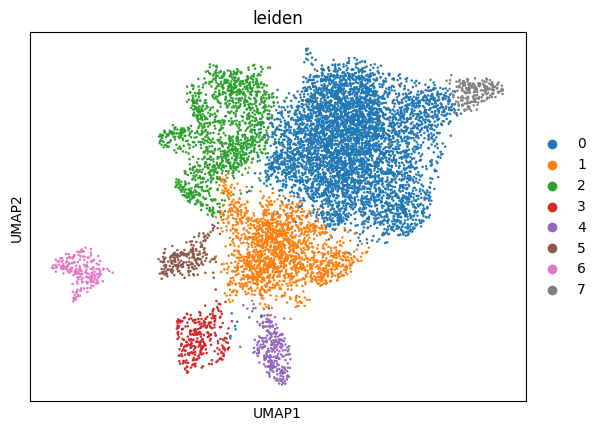

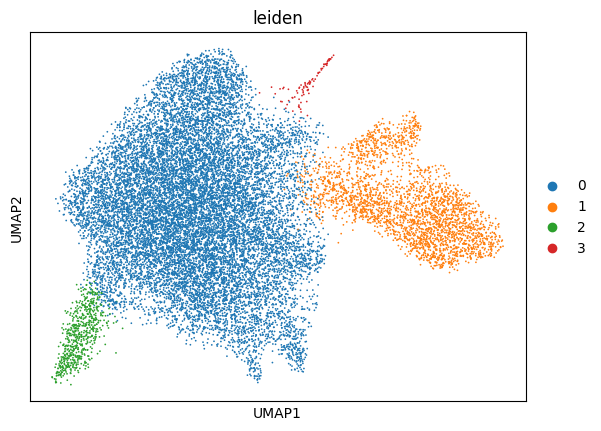

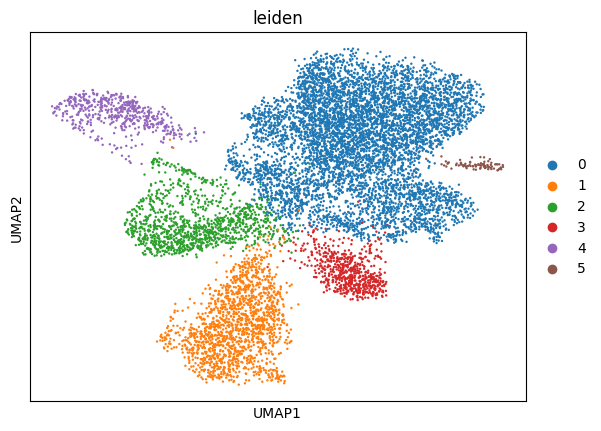

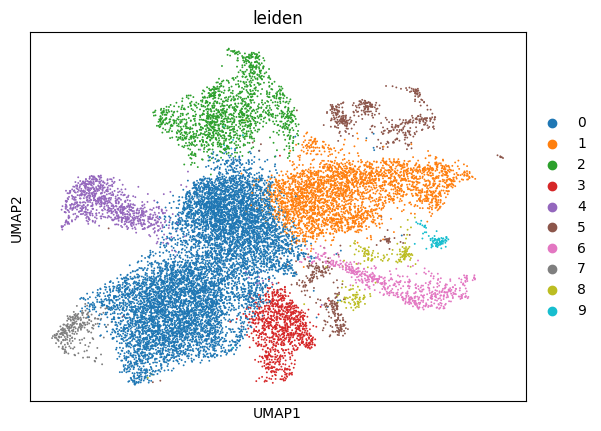

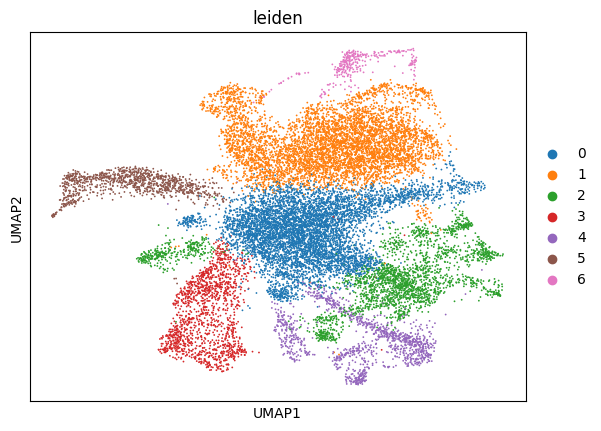

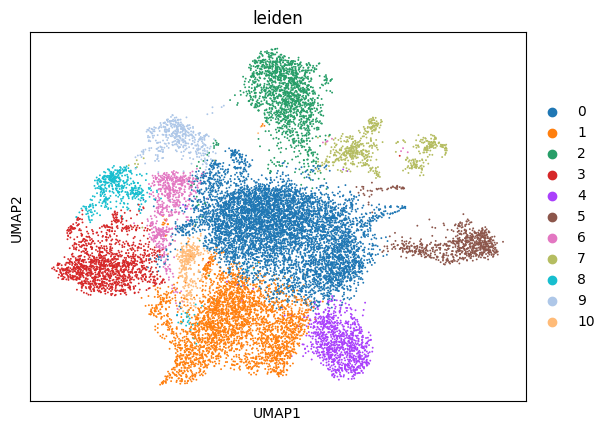

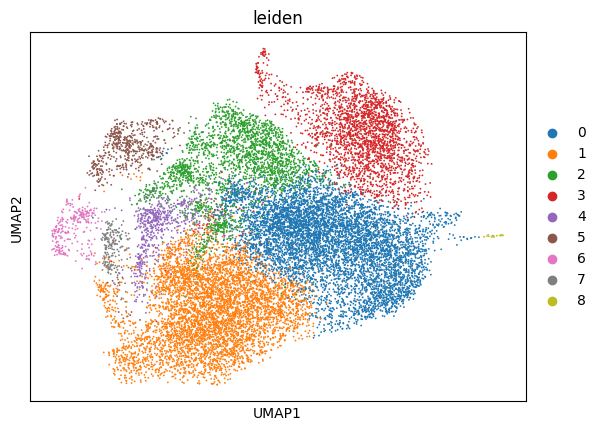

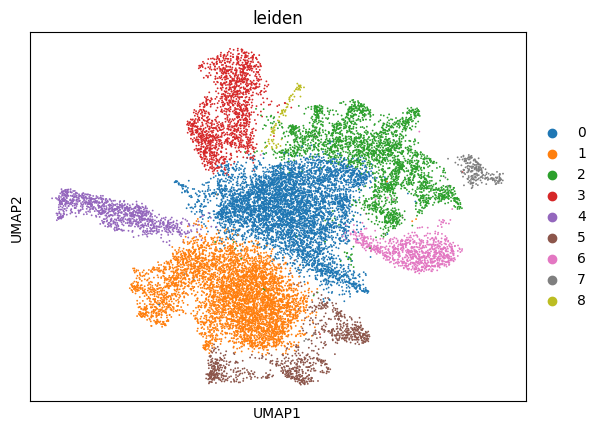

In [78]:
sc.pl.umap(
    data1,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data2,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data3,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data4,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data5,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data6,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data7,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data8,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data9,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)
sc.pl.umap(
    data10,
    color=["leiden"],
    wspace=0.5,
    ncols=2,
)

In [79]:
"""
marker_genes_dict = {
    'Excitatory Neurons': ['SLC17A7', 'CAMK2A', 'NRGN', 'GRIN2B'],
    'Inhibitory Neurons': ['GAD1', 'GAD2', 'SST', 'PVALB'],
    'Astrocytes': ['SLC1A2', 'AQP4', 'GFAP', 'S100B'],
    'Oligodendrocytes': ['MBP', 'MOG', 'PLP1', 'CNP'],
    'Oligodendrocyte Precursor Cells (OPCs)': ['PDGFRA', 'SOX10', 'CSPG4', 'OLIG2'],
    'Microglia/Myeloid Cells': ['CD74', 'CX3CR1', 'ITGAM', 'P2RY12'],
    'Endothelial Cells': ['CLDN5', 'FLT1', 'PECAM1', 'VWF']
}

marker_genes_in_data = dict()
for ct, markers in marker_genes_dict.items():
    markers_found = list()
    for marker in markers:
        if marker in data1.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found
"""

"\nmarker_genes_dict = {\n    'Excitatory Neurons': ['SLC17A7', 'CAMK2A', 'NRGN', 'GRIN2B'],\n    'Inhibitory Neurons': ['GAD1', 'GAD2', 'SST', 'PVALB'],\n    'Astrocytes': ['SLC1A2', 'AQP4', 'GFAP', 'S100B'],\n    'Oligodendrocytes': ['MBP', 'MOG', 'PLP1', 'CNP'],\n    'Oligodendrocyte Precursor Cells (OPCs)': ['PDGFRA', 'SOX10', 'CSPG4', 'OLIG2'],\n    'Microglia/Myeloid Cells': ['CD74', 'CX3CR1', 'ITGAM', 'P2RY12'],\n    'Endothelial Cells': ['CLDN5', 'FLT1', 'PECAM1', 'VWF']\n}\n\nmarker_genes_in_data = dict()\nfor ct, markers in marker_genes_dict.items():\n    markers_found = list()\n    for marker in markers:\n        if marker in data1.var.index:\n            markers_found.append(marker)\n    marker_genes_in_data[ct] = markers_found\n"

In [80]:
# sc.tl.leiden(data5, resolution=0.25)
# sc.tl.leiden(data9, resolution=0.15)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

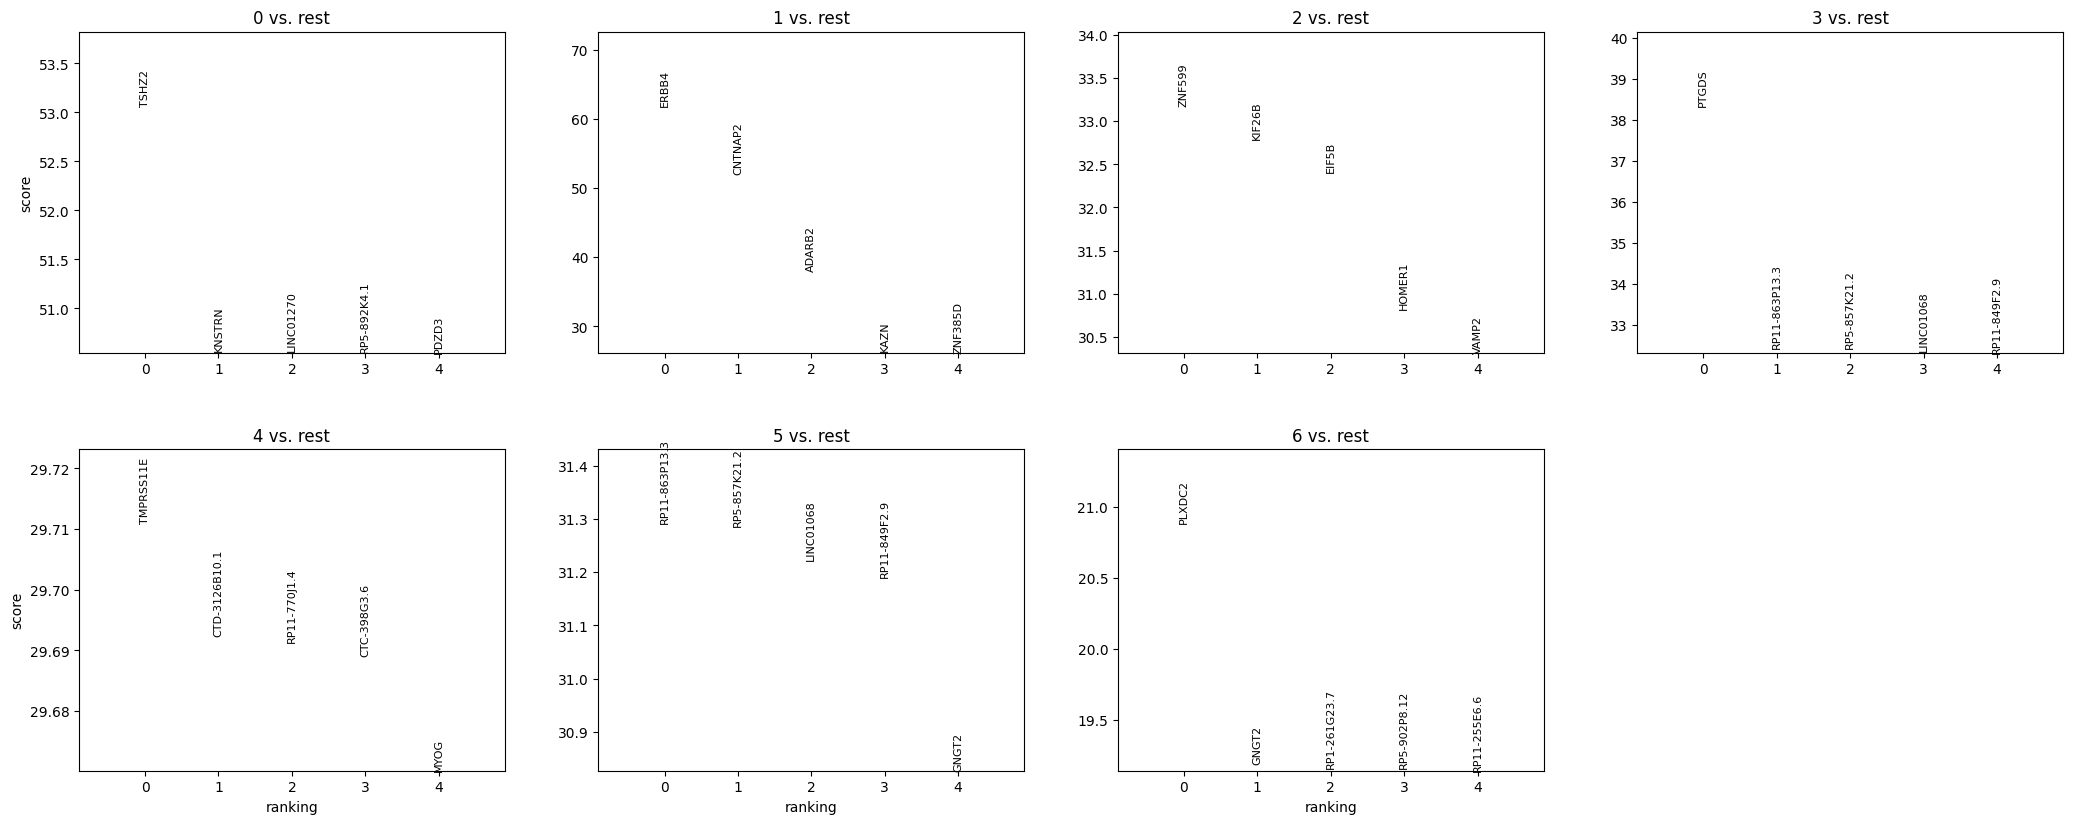

In [81]:
sc.tl.rank_genes_groups(data1, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(data1, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

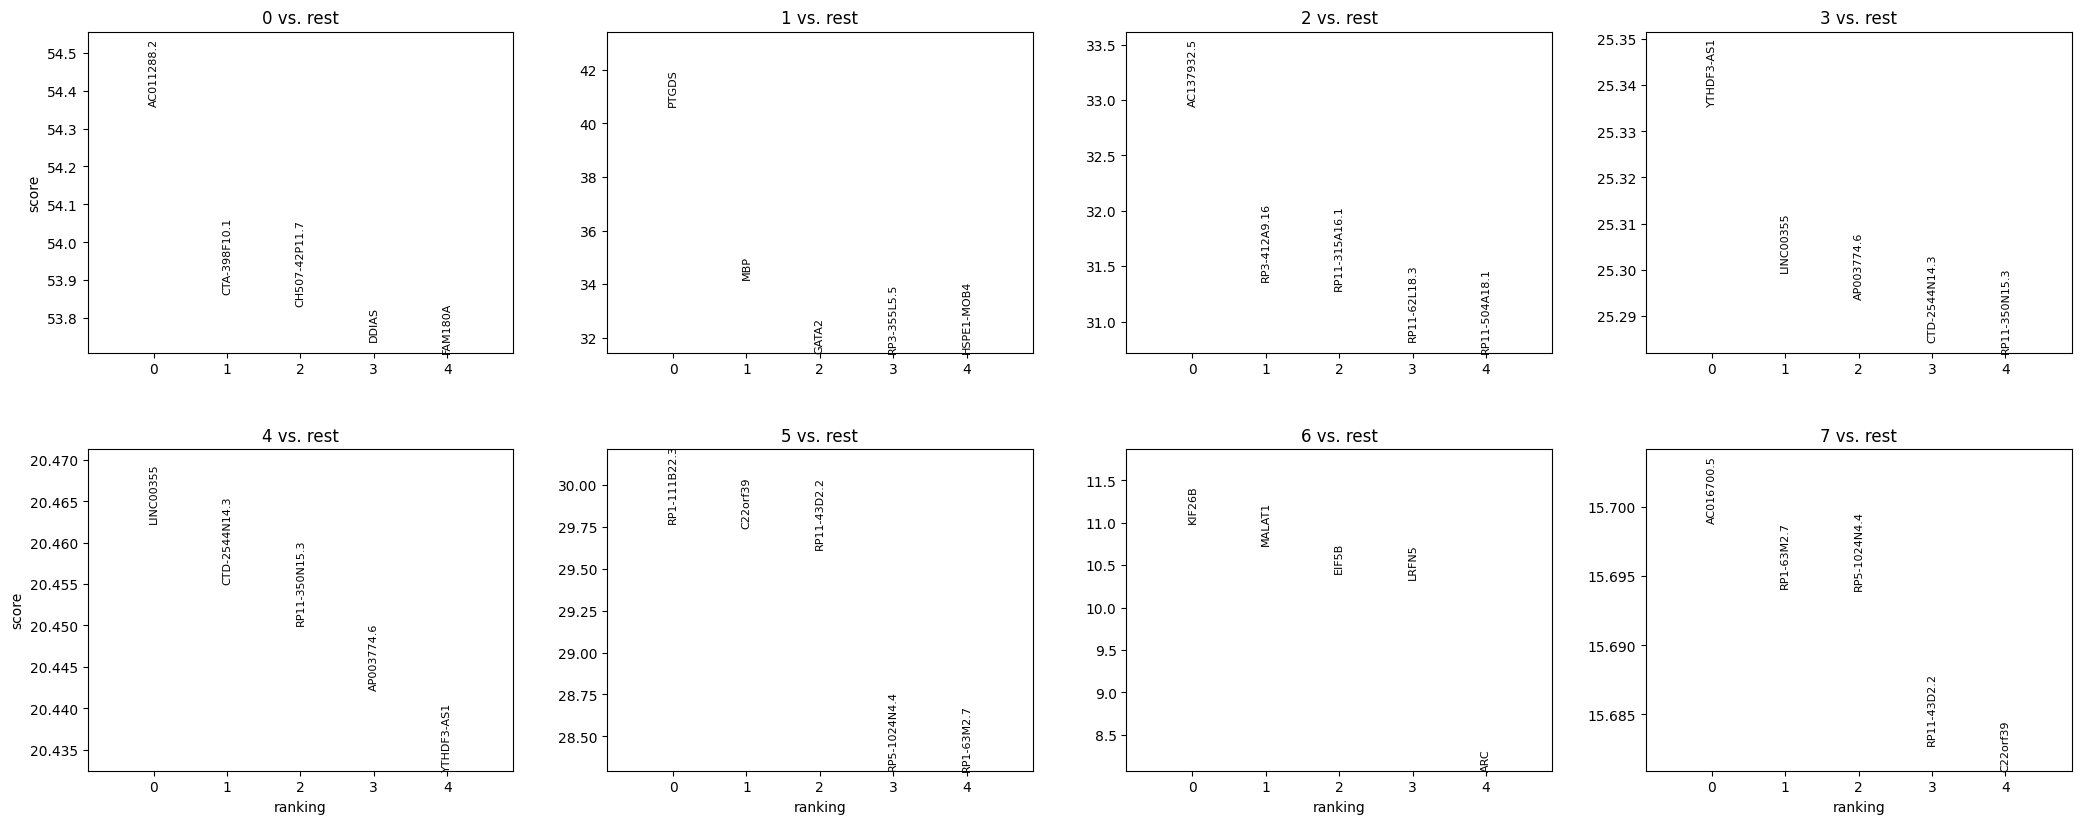

In [82]:
sc.tl.rank_genes_groups(data2, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(data2, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

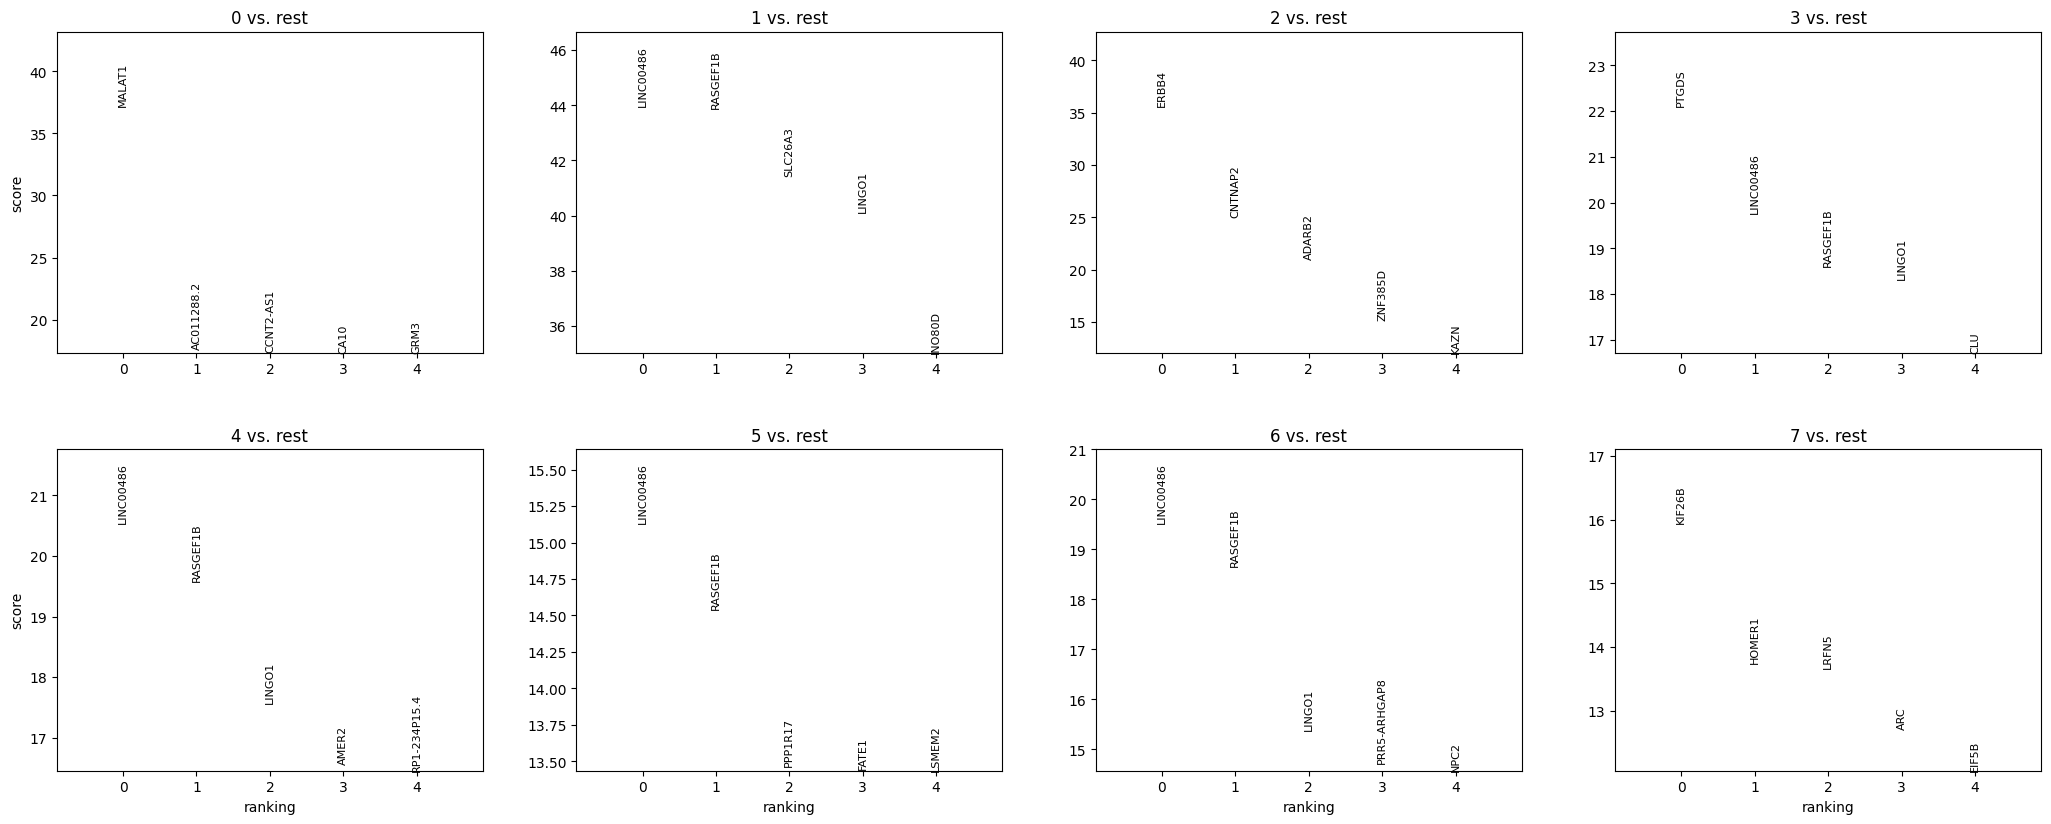

In [83]:
sc.tl.rank_genes_groups(data3, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(data3, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


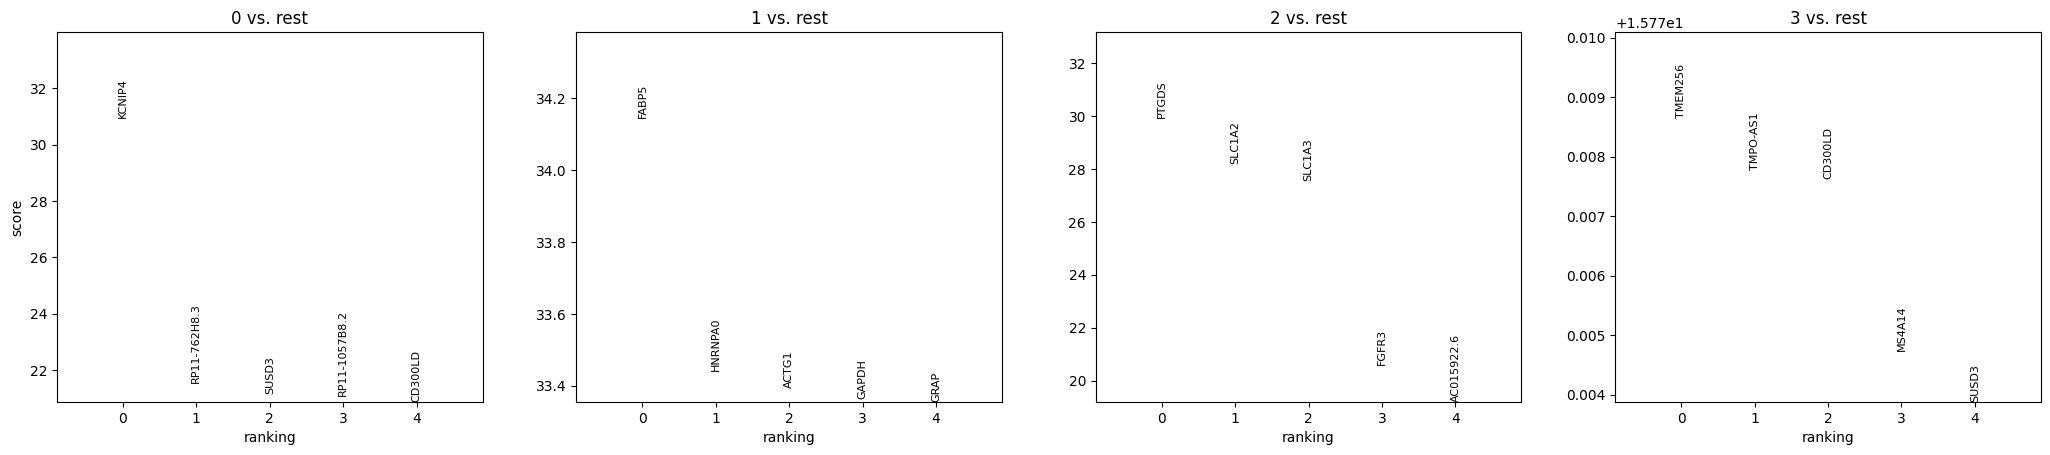

In [84]:
sc.tl.rank_genes_groups(data4, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(data4, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

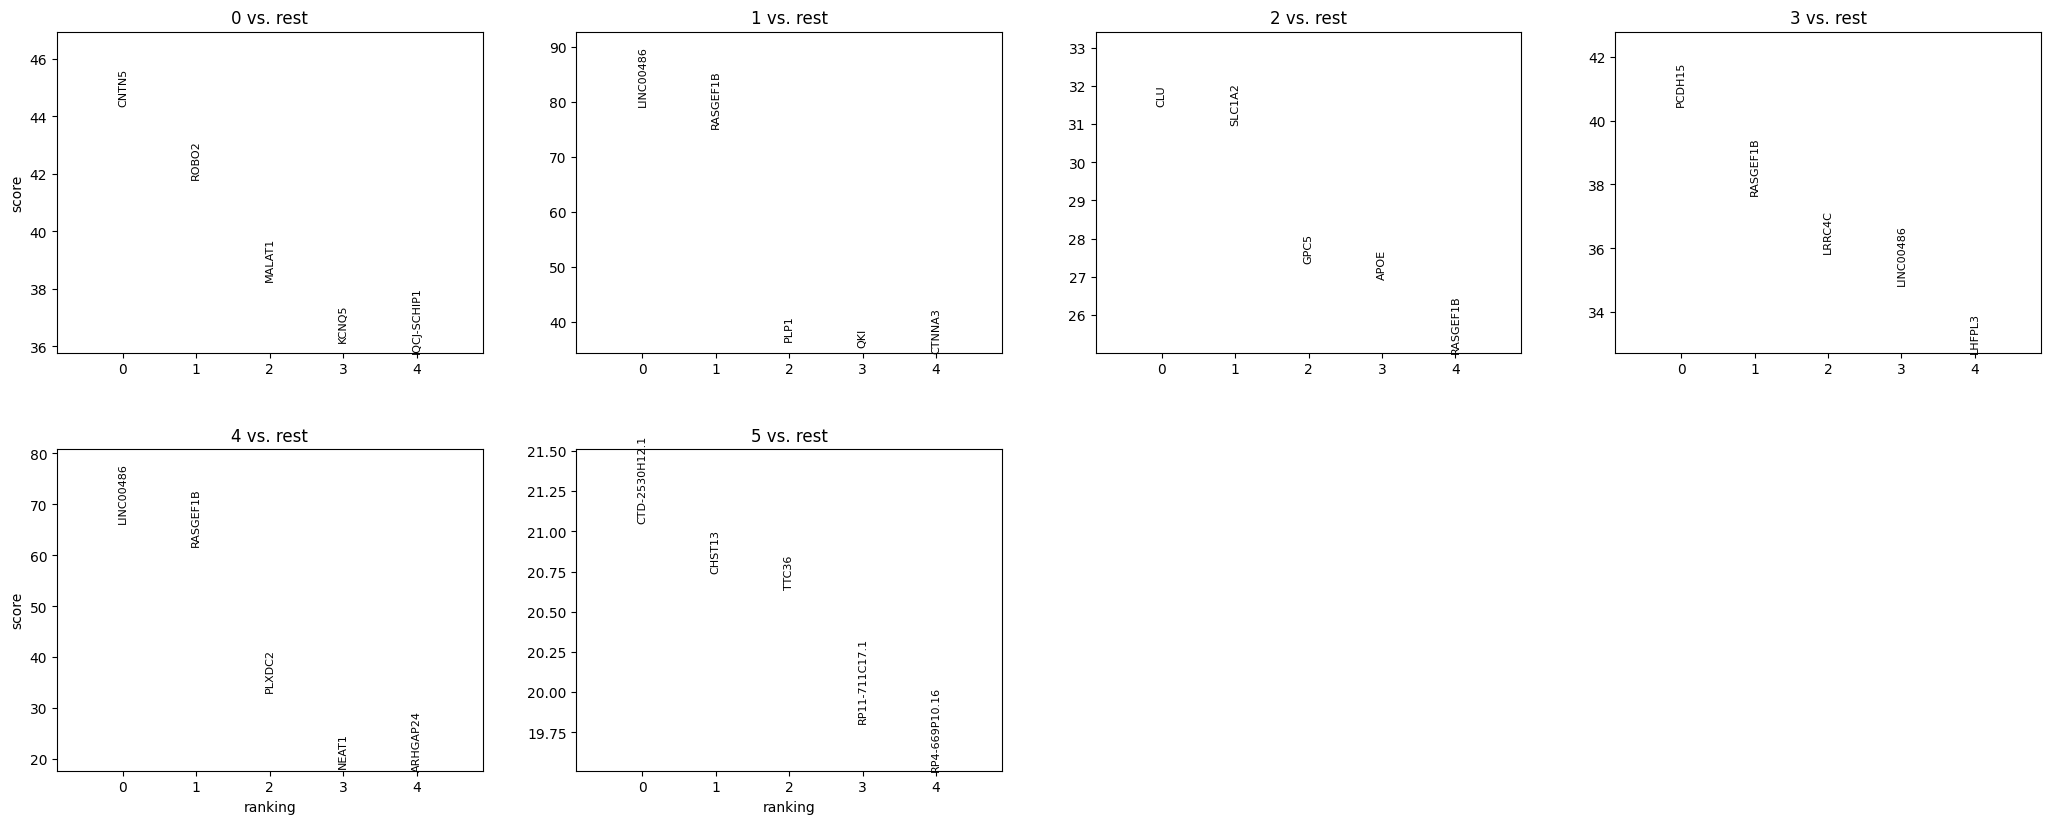

In [85]:
sc.tl.rank_genes_groups(data5, "leiden", method="t-test")
sc.pl.rank_genes_groups(data5, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

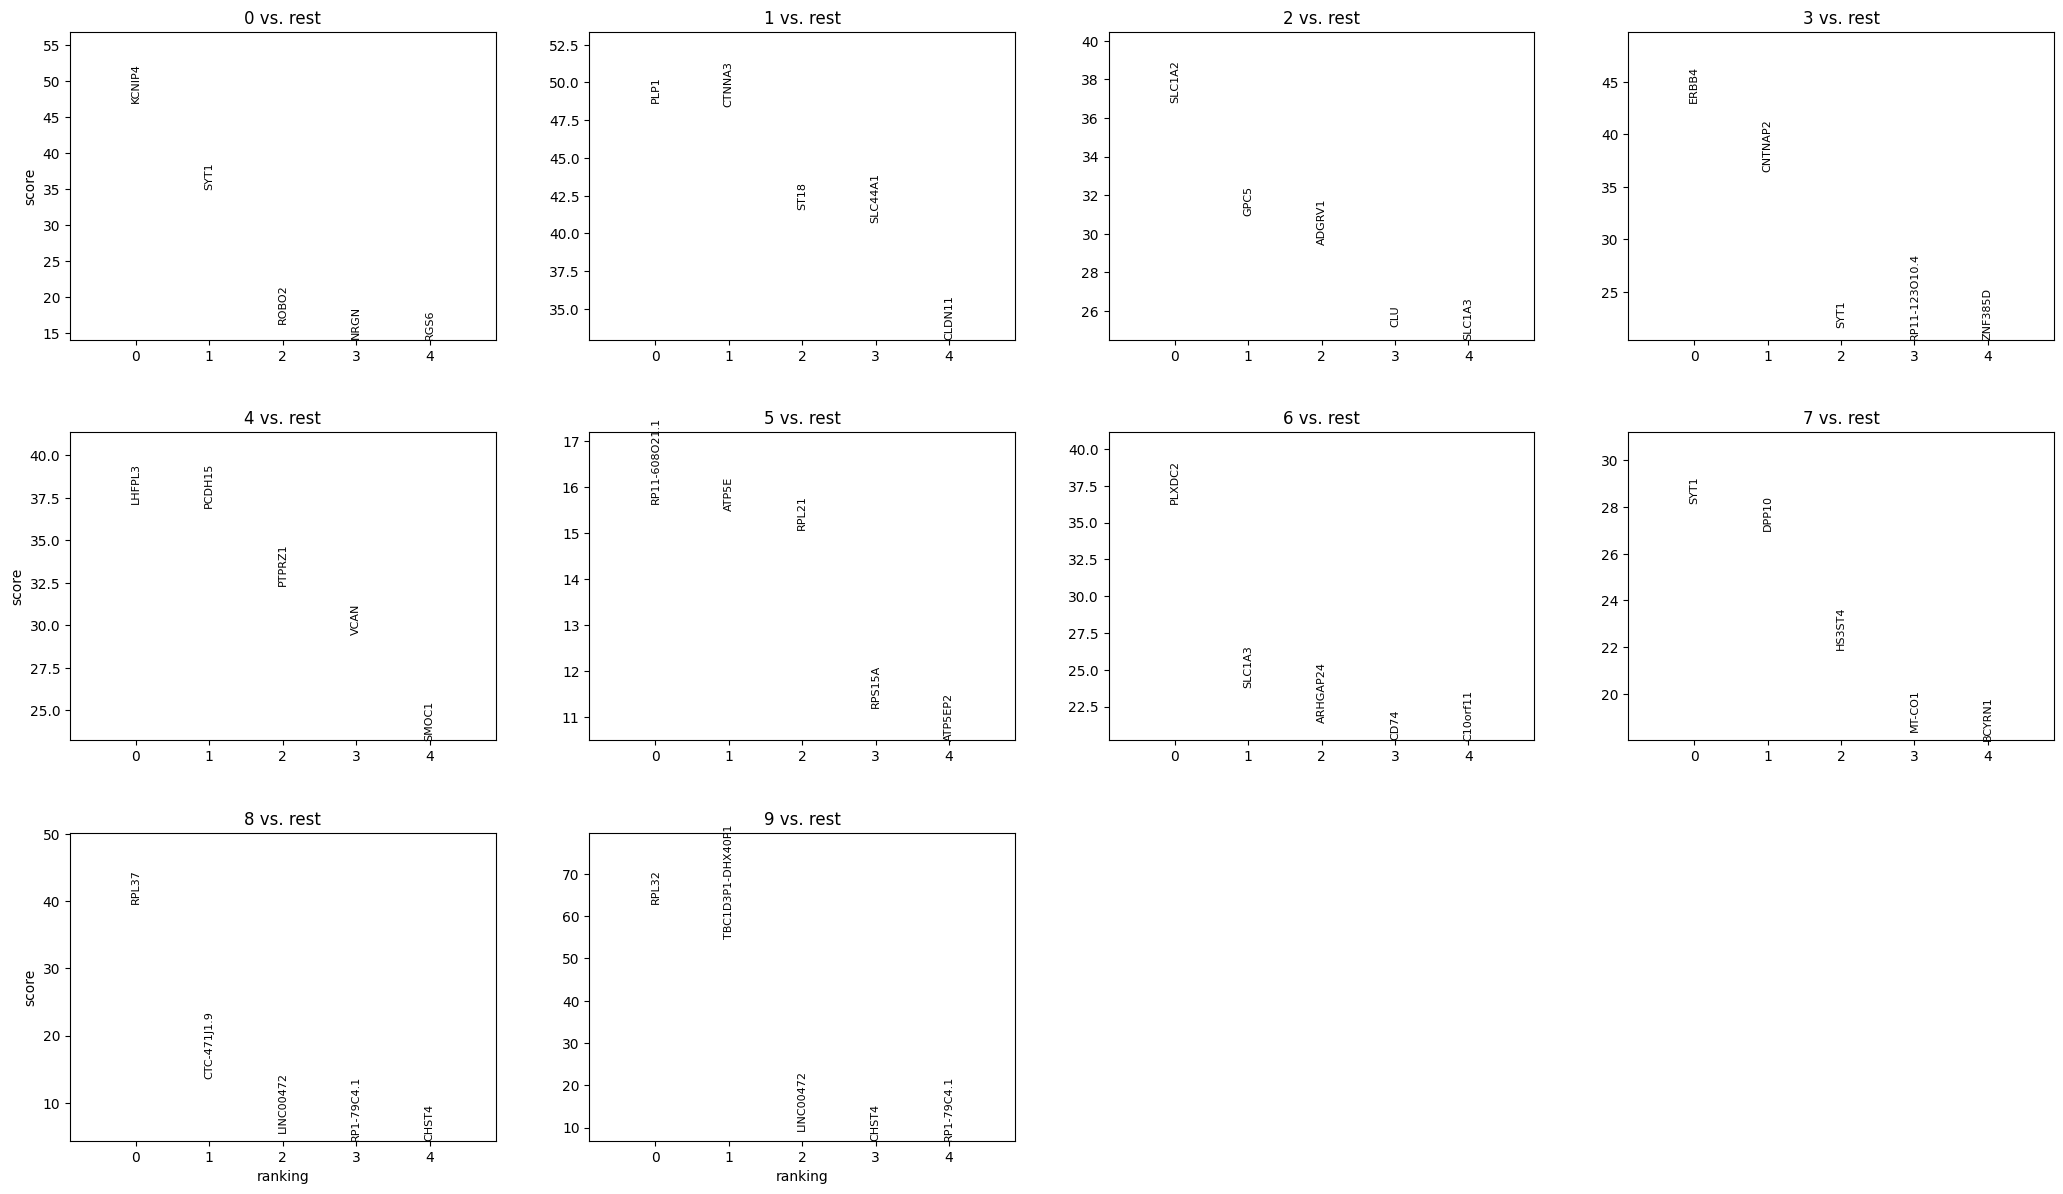

In [86]:
sc.tl.rank_genes_groups(data6, "leiden", method="t-test")
sc.pl.rank_genes_groups(data6, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

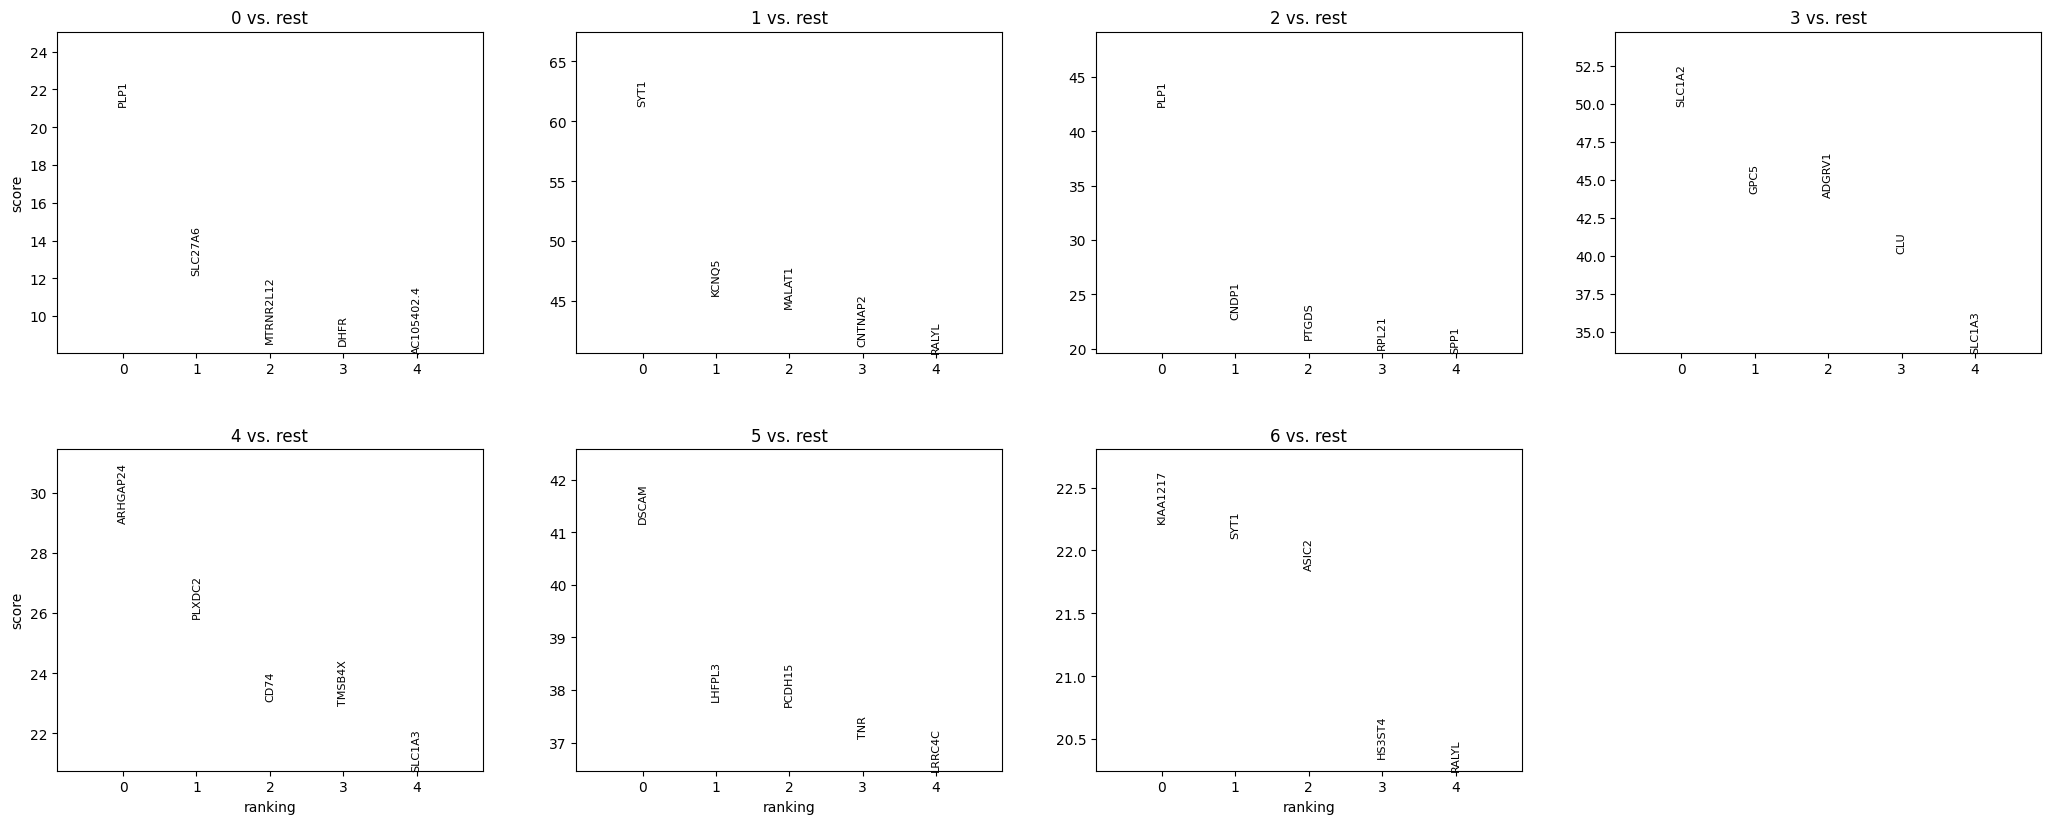

In [87]:
sc.tl.rank_genes_groups(data7, "leiden", method="t-test")
sc.pl.rank_genes_groups(data7, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

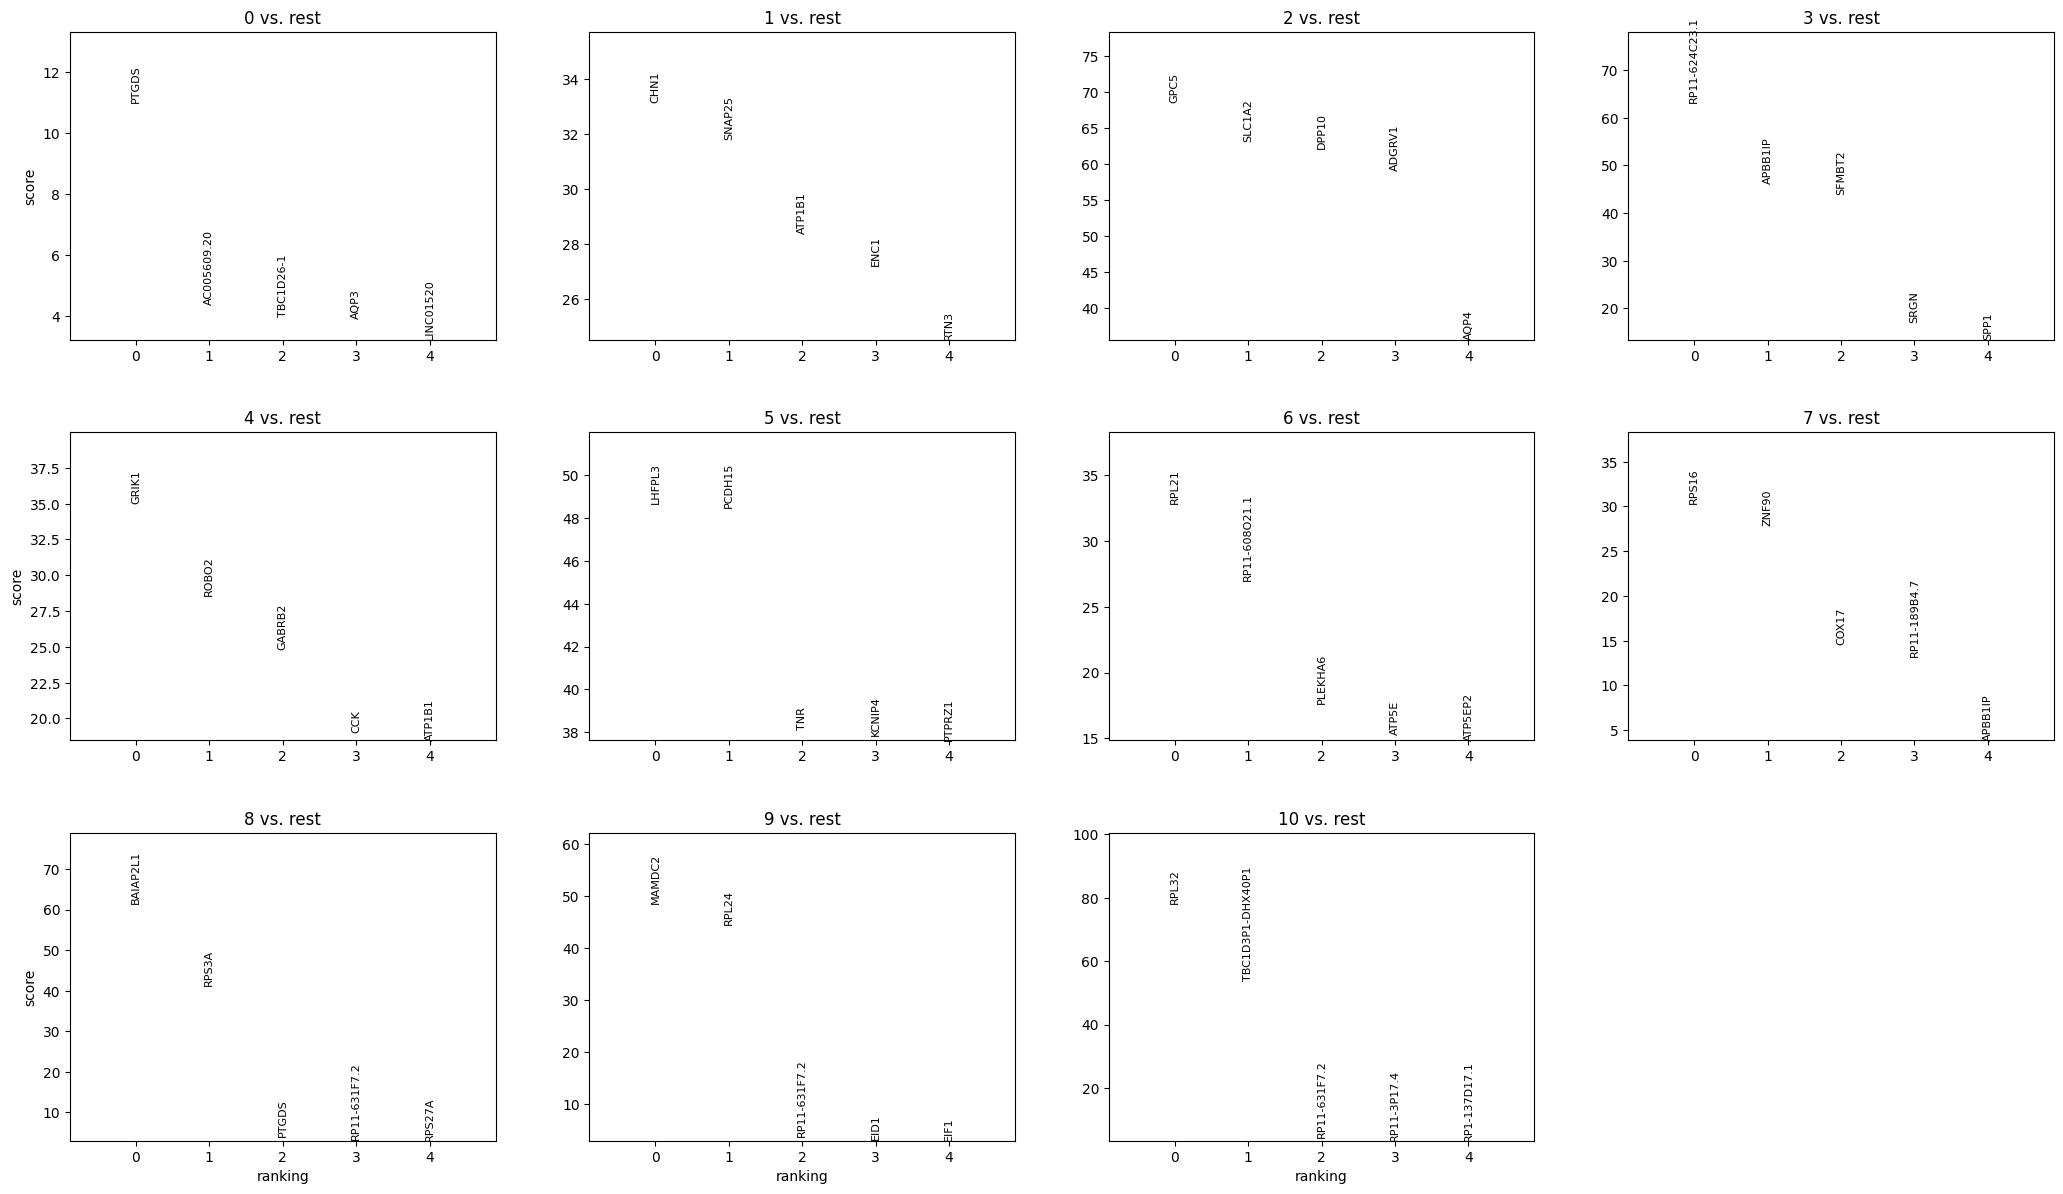

In [88]:
sc.tl.rank_genes_groups(data8, "leiden", method="t-test")
sc.pl.rank_genes_groups(data8, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

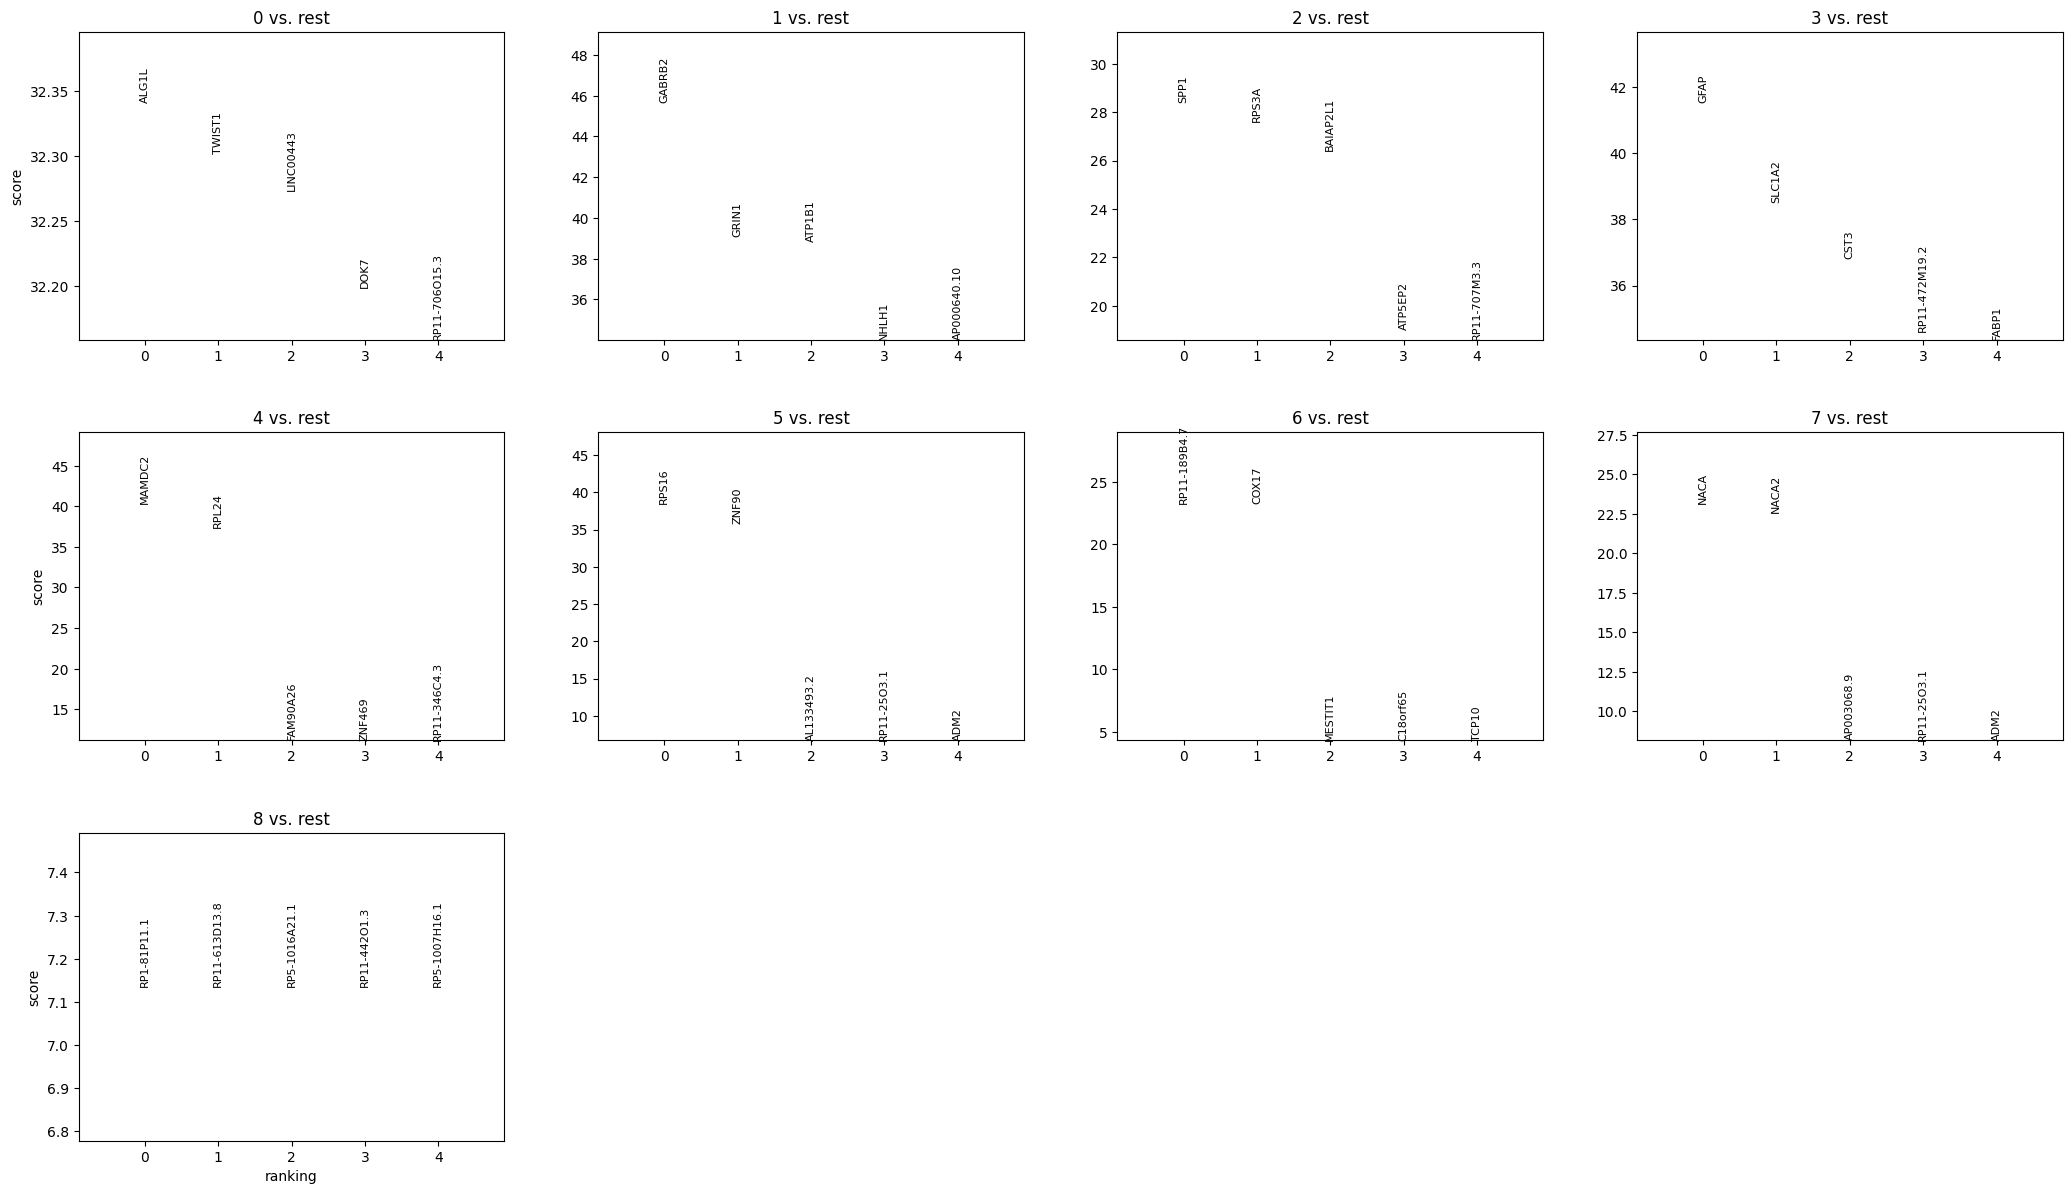

In [89]:
sc.tl.rank_genes_groups(data9, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(data9, n_genes=5, sharey=False)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

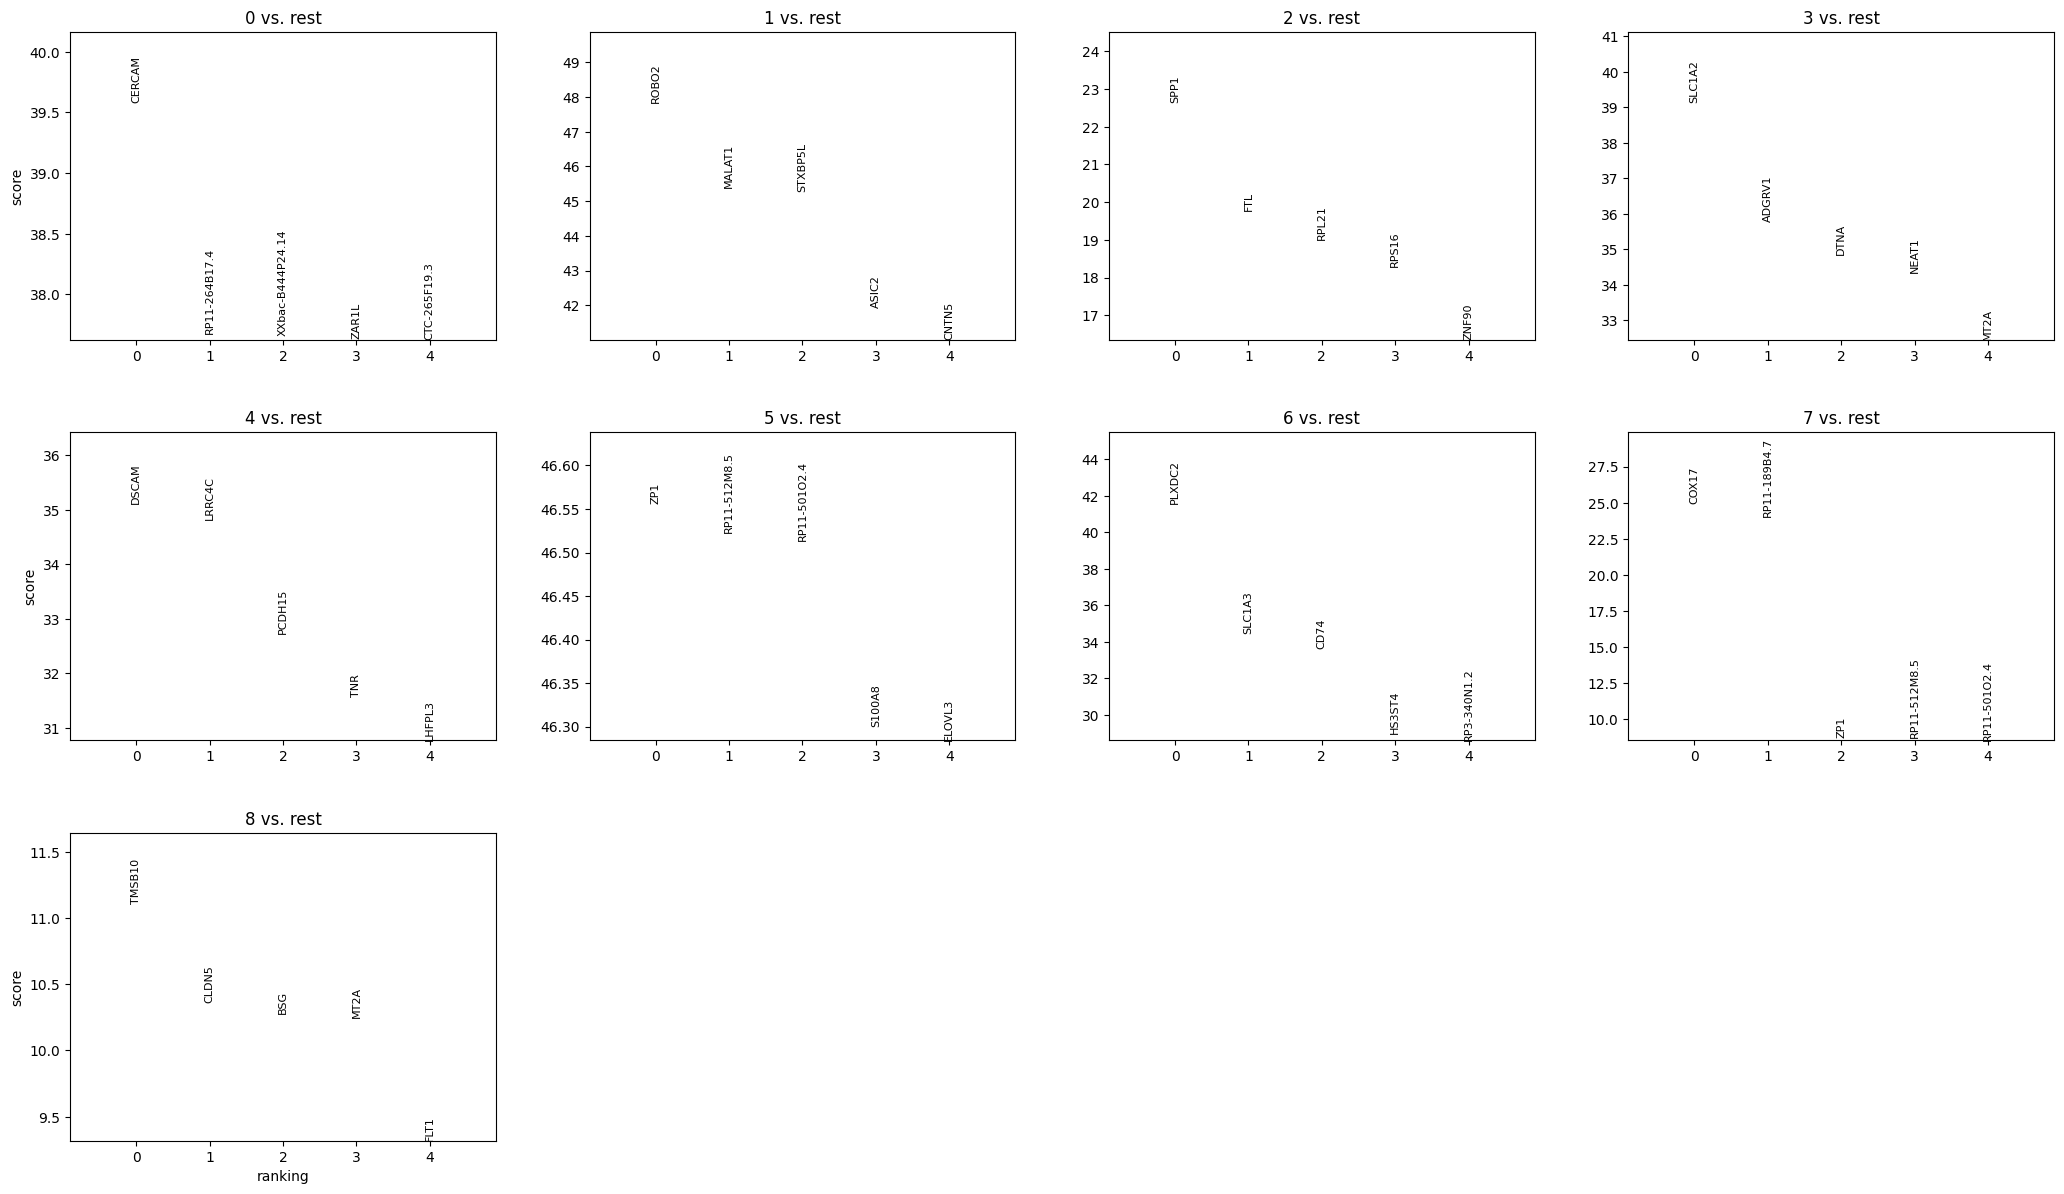

In [90]:
sc.tl.rank_genes_groups(data10, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(data10, n_genes=5, sharey=False)